In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import string
from subprocess import check_output
import seaborn as sns
from pylab import *
%matplotlib inline
sns.set()

In [2]:
#Importation de la table
df = pd.read_csv("tab_A7_6mn.csv", sep = ',')
#Lire la table en dataframe
df = pd.DataFrame(df)
df.head()

rgs   pr    m  js       jma   hhmm  To    Q  Vitesse    A Code
0  759#M7I  264  687  Ve  01/01/16  00:00   1  340       95  759  M7I
1  760#M7J  265  320  Ve  01/01/16  00:00   3  360      103  760  M7J
2  709#M7i  264  687  Ve  01/01/16  00:00   2  510       99  709  M7i
3  710#M7j  265  320  Ve  01/01/16  00:00   1  290       97  710  M7j
4  764#M7N  267  230  Ve  01/01/16  00:00   0    0        0  764  M7N

In [3]:
selection = (df['Q'] <= 6000)
q = df[selection]
### Vitesse horaire
selection = (df['Vitesse'] <= 160)
v = df[selection]
### To horaire
selection = (df['To'] <= 100)
t = df[selection]
### Débit et TO incompatibles
selection =  (df['Q'] > 5)
qq = df[selection]
### Vitesse horaire
selection = (df['Vitesse'] > 0)
vv = df[selection]
### To horaire
selection = (df['To'] > 0)
tt = df[selection]
# Transformer les donnees a des dataframe
lst = [q,v,t,qq,vv,tt]
for i in lst :
    i = pd.DataFrame(i)

In [4]:


# Eliminer les valeurs aberrantes
inter1 = pd.merge(q, v, how='inner')
inter2 = pd.merge(t, qq, how='inner')
inter3 = pd.merge(vv, tt, how='inner')
inter4 = pd.merge(inter1, inter2, how='inner')
df = pd.merge(inter3, inter4, how='inner')
df.describe()



pr              m             To              Q  \
count  978220.000000  978220.000000  978220.000000  978220.000000   
mean      271.635782     494.627473      10.861530    2076.327023   
std         4.277659     274.310524      10.205109    1438.277246   
min       264.000000      86.000000       1.000000      10.000000   
25%       269.000000     278.000000       3.000000     780.000000   
50%       272.000000     440.000000       8.000000    1810.000000   
75%       275.000000     790.000000      16.000000    3190.000000   
max       279.000000     900.000000     100.000000    6000.000000   

             Vitesse              A  
count  978220.000000  978220.000000  
mean       88.658586     792.809158  
std        14.057490      51.593181  
min         1.000000     709.000000  
25%        82.000000     760.000000  
50%        90.000000     805.000000  
75%        98.000000     851.000000  
max       160.000000     865.000000

In [5]:
df = df[~df['js'].astype(str).str.startswith('Sa')]
df = df[~df['js'].astype(str).str.startswith('Di')]
df.head()

rgs   pr    m  js       jma   hhmm  To    Q  Vitesse    A Code
0  759#M7I  264  687  Ve  01/01/16  00:00   1  340       95  759  M7I
1  760#M7J  265  320  Ve  01/01/16  00:00   3  360      103  760  M7J
2  709#M7i  264  687  Ve  01/01/16  00:00   2  510       99  709  M7i
3  710#M7j  265  320  Ve  01/01/16  00:00   1  290       97  710  M7j
4  765#M7O  267  861  Ve  01/01/16  00:00   1  360      103  765  M7O

In [6]:
# Ajouter le champs de Concentration K
df['K'] = (df['Q'])/(df['Vitesse'])
#Trier la table par heure.
df = df.sort_values(by = 'hhmm')
df.describe()

pr              m             To              Q  \
count  679387.000000  679387.000000  679387.000000  679387.000000   
mean      271.613936     496.324438      12.238358    2214.834402   
std         4.281171     274.221317      11.134480    1500.296849   
min       264.000000      86.000000       1.000000      10.000000   
25%       269.000000     278.000000       4.000000     840.000000   
50%       272.000000     440.000000      10.000000    2010.000000   
75%       275.000000     790.000000      18.000000    3400.000000   
max       279.000000     900.000000     100.000000    6000.000000   

             Vitesse              A              K  
count  679387.000000  679387.000000  679387.000000  
mean       87.684411     792.606361      27.419988  
std        14.882436      51.592856      22.001172  
min         1.000000     709.000000       0.158730  
25%        81.000000     760.000000       9.148936  
50%        89.000000     805.000000      23.152174  
75%        97.000000     851.000000      40.531915  
max       160.000000     865.000000     227.777778

Text(0.5, 0.98, 'Diagramme de niveau de service, $Q=f(K)$ et $Q=f(To)$ ')

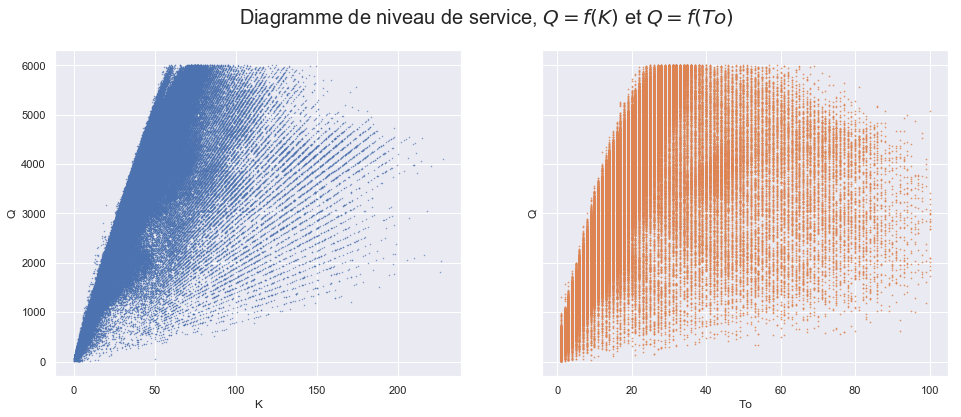

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6), sharey=True)
sns.regplot(x= df['K'], y=df['Q'], fit_reg=False,scatter_kws={'s':.2}, ax=axs[0])
sns.regplot(x= df['To'], y=df['Q'], fit_reg=False,scatter_kws={'s':.5}, ax=axs[1])
fig.suptitle("Diagramme de niveau de service, $Q=f(K)$ et $Q=f(To)$ ", fontsize=20)

In [8]:
#Identifier les donnees de chaque stations
groupe = df.groupby('Code')
#Table de donnees de la station M7i
M7i = groupe.get_group('M7i')
#transformer la table en dataframe
M7i = pd.DataFrame(M7i)
M7i.describe()

pr        m            To             Q       Vitesse        A  \
count  22674.0  22674.0  22674.000000  22674.000000  22674.000000  22674.0   
mean     264.0    687.0     16.645144   2438.975037     86.955500    709.0   
std        0.0      0.0     14.138722   1488.668693     13.508025      0.0   
min      264.0    687.0      1.000000     40.000000      6.000000    709.0   
25%      264.0    687.0      4.000000    860.000000     84.000000    709.0   
50%      264.0    687.0     16.000000   2930.000000     90.000000    709.0   
75%      264.0    687.0     23.000000   3680.000000     96.000000    709.0   
max      264.0    687.0     93.000000   5490.000000    118.000000    709.0   

                  K  
count  22674.000000  
mean      31.115019  
std       22.343376  
min        0.869565  
25%        8.865979  
50%       33.200683  
75%       46.049383  
max      139.285714

In [37]:
groupe.values()

AttributeError: Cannot access attribute 'values' of 'DataFrameGroupBy' objects, try using the 'apply' method

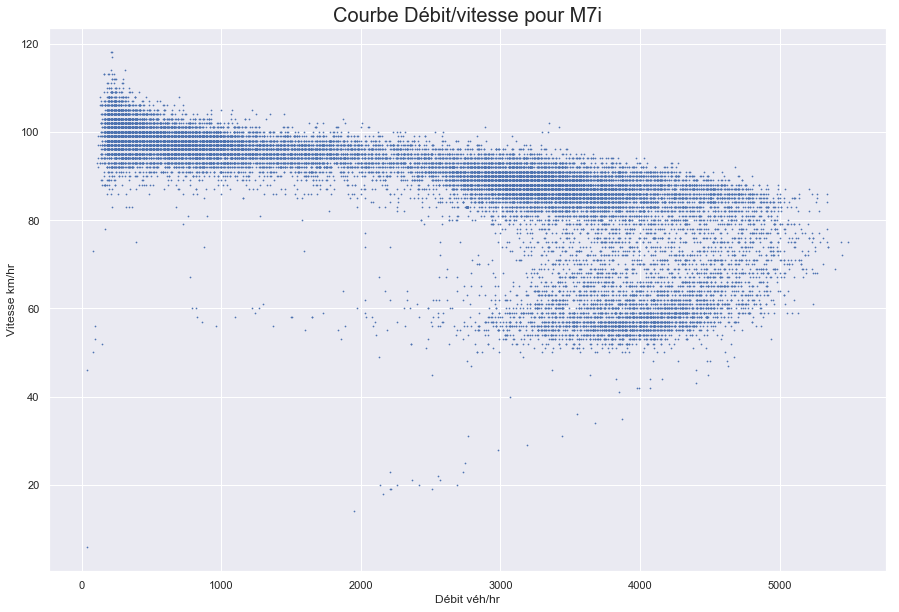

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(M7i.Q, M7i.Vitesse, s =.5)
plt.title("Courbe Débit/vitesse pour M7i",fontsize=20)
plt.xlabel('Débit véh/hr')
plt.ylabel('Vitesse km/hr')
plt.show()

Text(0.5, 1.0, 'Vitesse = f(Q)')

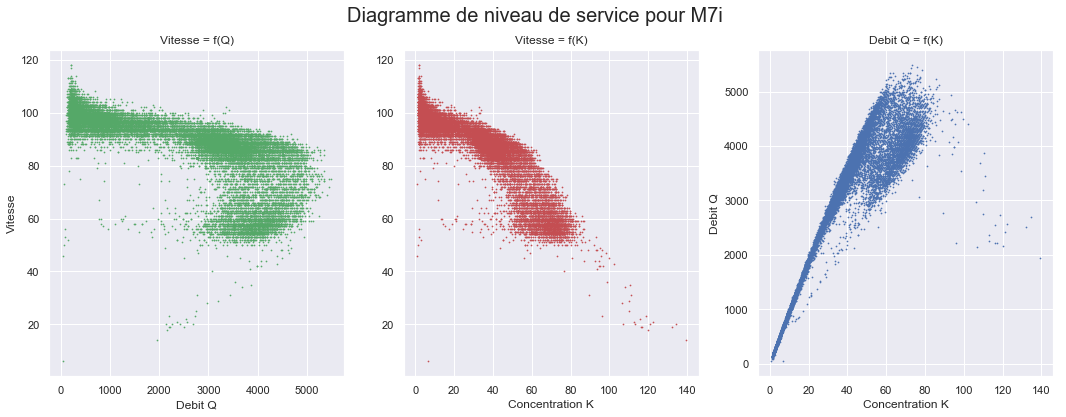

In [10]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133)

#Data
ax1.scatter(M7i['Q'], M7i['Vitesse'], s=.5, c='g', marker="o")
ax2.scatter(M7i['K'], M7i['Vitesse'], s=.5, c='r', marker="o")
ax3.scatter(M7i['K'], M7i['Q'], s=.5, c='b', marker="o")

#Labels
ax1.set_xlabel('Debit Q'); ax1.set_ylabel('Vitesse')
ax2.set_xlabel('Concentration K'); fig.suptitle("Diagramme de niveau de service pour M7i", fontsize=20)
ax3.set_xlabel('Concentration K'); ax3.set_ylabel('Debit Q')
ax3.set_title('Debit Q = f(K)'); ax2.set_title('Vitesse = f(K)'); ax1.set_title('Vitesse = f(Q)')
plt.show()


## Détermination de la capacité :

On préconise de retenir la capacité comme étant la valeur correspondant au quantile 75 de la distribution des débits des heures de pointe, journalières retenues, du matin et du soir.


In [11]:


# L'heure de pointe du matin
cond1 = df.apply ( lambda row : row["hhmm"] > '07:54', axis = 1 )
cond2 = df.apply ( lambda row : row["hhmm"] < '09:06', axis = 1 )
# L'intersection des deux condition.
inter1 = pd.merge(df [cond1], df [cond2], how='inner'); inter1.describe()



pr             m            To             Q       Vitesse  \
count  33857.000000  33857.000000  33857.000000  33857.000000  33857.000000   
mean     271.652007    500.133798     22.767995   3197.429483     77.294474   
std        4.276210    273.509649     16.610955   1414.884044     20.054167   
min      264.000000     86.000000      1.000000     20.000000      6.000000   
25%      269.000000    278.000000     11.000000   2030.000000     68.000000   
50%      272.000000    440.000000     19.000000   3250.000000     82.000000   
75%      275.000000    790.000000     28.000000   4330.000000     91.000000   
max      279.000000    900.000000    100.000000   6000.000000    144.000000   

                  A             K  
count  33857.000000  33857.000000  
mean     791.468943     45.912273  
std       51.252434     27.087387  
min      709.000000      0.675676  
25%      760.000000     25.797101  
50%      804.000000     42.736842  
75%      851.000000     60.000000  
max      865.000000    198.181818

In [12]:


# L'heure de pointe du soir
cond3 = df.apply ( lambda row : row["hhmm"] > '17:54', axis = 1 )
cond4 = df.apply ( lambda row : row["hhmm"] < '18:06', axis = 1 )
# L'intersection des deux condition.
inter2 = pd.merge(df [cond3], df [cond4],how='inner')
inter2.describe()

pr            m           To            Q      Vitesse  \
count  3144.000000  3144.000000  3144.000000  3144.000000  3144.000000   
mean    271.728053   500.307888    20.251590  3332.557252    77.351145   
std       4.268155   274.336544    13.505682  1444.415496    19.618055   
min     264.000000    86.000000     1.000000   110.000000    10.000000   
25%     269.000000   278.000000    12.000000  2210.000000    70.000000   
50%     272.000000   440.000000    18.000000  3385.000000    82.000000   
75%     275.000000   790.000000    25.000000  4602.500000    90.000000   
max     279.000000   900.000000    97.000000  6000.000000   114.000000   

                 A            K  
count  3144.000000  3144.000000  
mean    793.058524    46.439250  
std      51.434779    25.102238  
min     709.000000     2.048193  
25%     760.000000    28.862013  
50%     805.000000    45.833333  
75%     851.000000    59.188385  
max     865.000000   178.125000

In [13]:
C = 4466.25

In [14]:
# NSC 1 : trafic fluide.
NSC1 = df[(df['K'] <= 34)]
# NSC 2 : trafic de fluide a dense.
NSC2 = df[(df['K'] <= 42.65) & (df['K'] > 34)]
# NSC 3 : trafic dense.
NSC3 = df[(df['K'] <= 75.84) & (df['K'] > 42.65)]
# NSC 4 : trafic saturé.
NSC4 = df[(df['K'] > 75.84)]

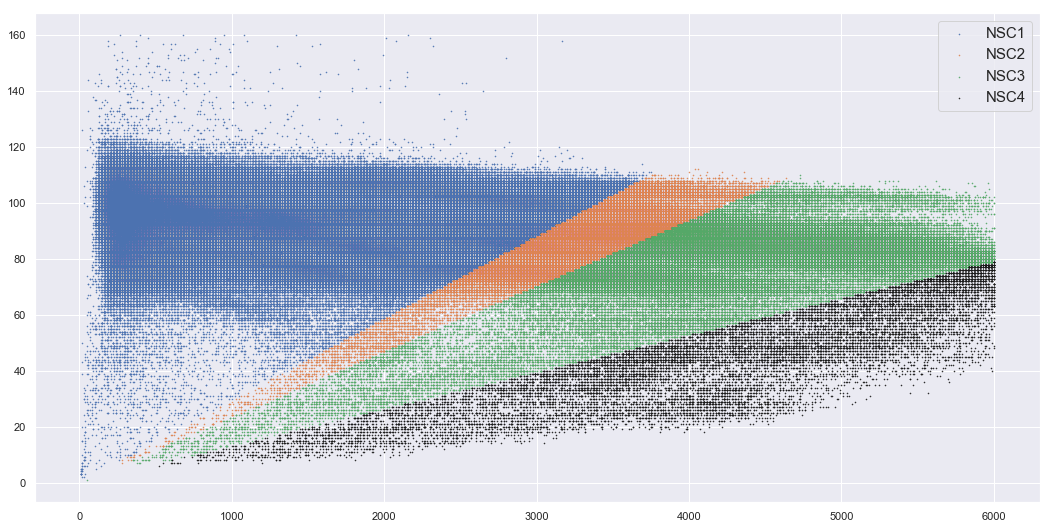

In [15]:
import pylab as plot

fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(111)
ax1.scatter(NSC1['Q'], NSC1['Vitesse'], s=.3, label='NSC1')
ax1.scatter(NSC2['Q'], NSC2['Vitesse'], s=.3, label='NSC2')
ax1.scatter(NSC3['Q'], NSC3['Vitesse'], s=.3, label='NSC3')
ax1.scatter(NSC4['Q'], NSC4['Vitesse'], s=.3, c = 'k', label='NSC4')

plt.legend(loc='upper right',prop={'size': 15});
plt.show()

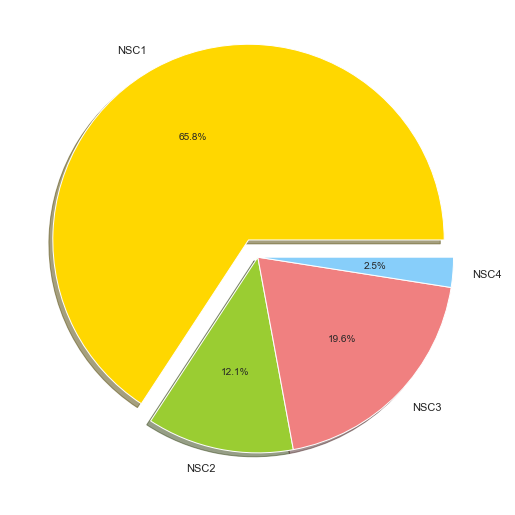

In [16]:
# Data to plot
labels = 'NSC1', 'NSC2', 'NSC3', 'NSC4'
sizes = [len(NSC1), len(NSC2), len(NSC3), len(NSC4)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(13, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.show()

In [17]:
liste = groupe.groups.keys()
type(liste)

dict_keys

In [38]:
liste

dict_keys(['M7I', 'M7J', 'M7N', 'M7O', 'M7P', 'M7Q', 'M7R', 'M7S', 'M7T', 'M7U', 'M7i', 'M7j', 'M7n', 'M7o', 'M7p', 'M7q', 'M7r', 'M7s', 'M7t', 'M7u', 'M8A', 'M8B', 'M8D', 'M8E', 'M8F', 'M8G', 'M8H', 'M8I', 'M8J', 'M8K', 'M8N', 'M8O', 'M8a', 'M8b', 'M8d', 'M8e', 'M8f', 'M8g', 'M8h', 'M8i', 'M8j', 'M8k', 'M8n', 'M8o'])

In [18]:

# Convertir liste en 'list'
keys = list(liste)
type(keys)

list

In [42]:
keys[9]

'M7U'

In [20]:
import string
string.ascii_lowercase[:14]

'abcdefghijklmn'

In [22]:
m = string.ascii_lowercase[:]

In [25]:
len(m)

26

In [48]:
# rename columns
L=[]
for i in range(44):
    
    L.append(groupe.get_group(keys[i]))

In [50]:
a = L[30]

In [51]:
type(a)

pandas.core.frame.DataFrame

In [54]:
# NSC 1 : trafic fluide.
NSC1=[]
NSC2=[]
NSC3=[]
NSC4=[]
for i in range(44):
    NSC1.append(L[i][(L[i]['K'] <= 34)])
# NSC 2 : trafic de fluide a dense.
    NSC2.append(L[i][(L[i]['K'] <= 42.65) & (L[i]['K'] > 34)])
# NSC 3 : trafic dense.
    NSC3.append(L[i][(L[i]['K'] <= 75.84) & (L[i]['K'] > 42.65)])
# NSC 4 : trafic saturé.
    NSC4.append(L[i][(L[i]['K'] > 75.84)])

Lq station M7I


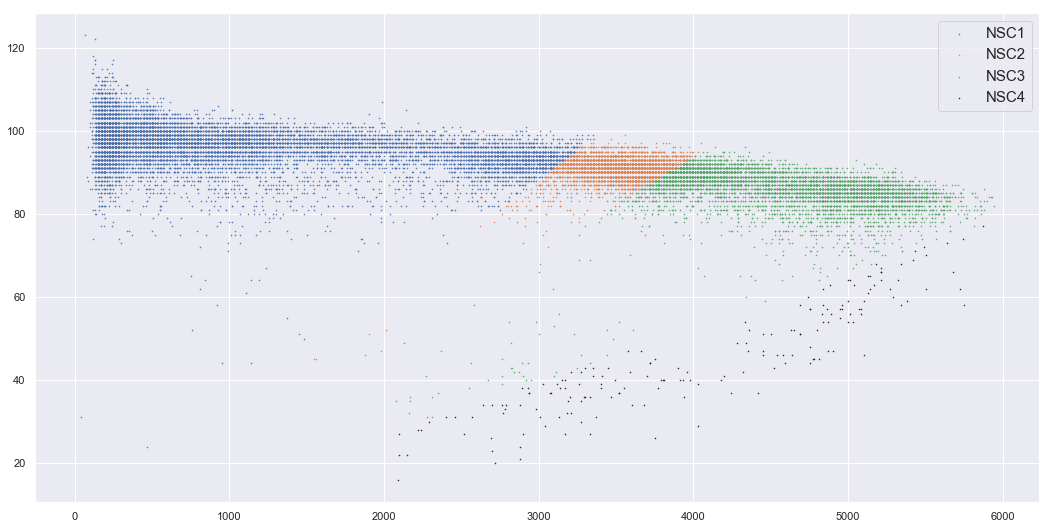

Lq station M7J


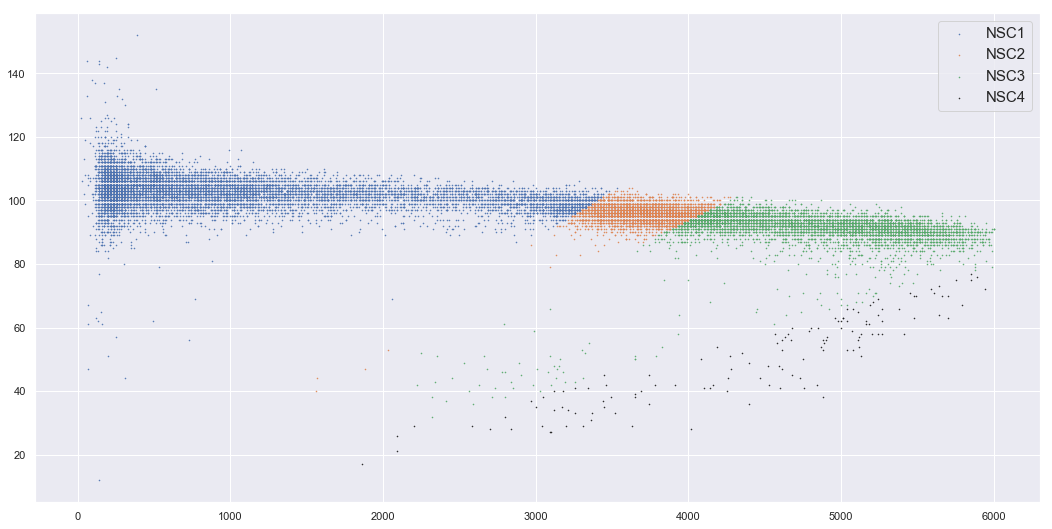

Lq station M7N


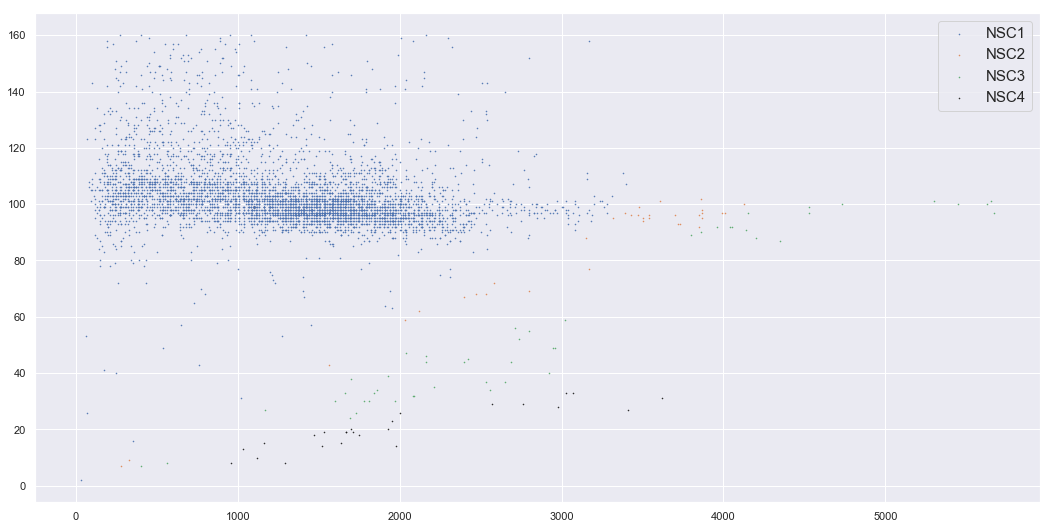

Lq station M7O


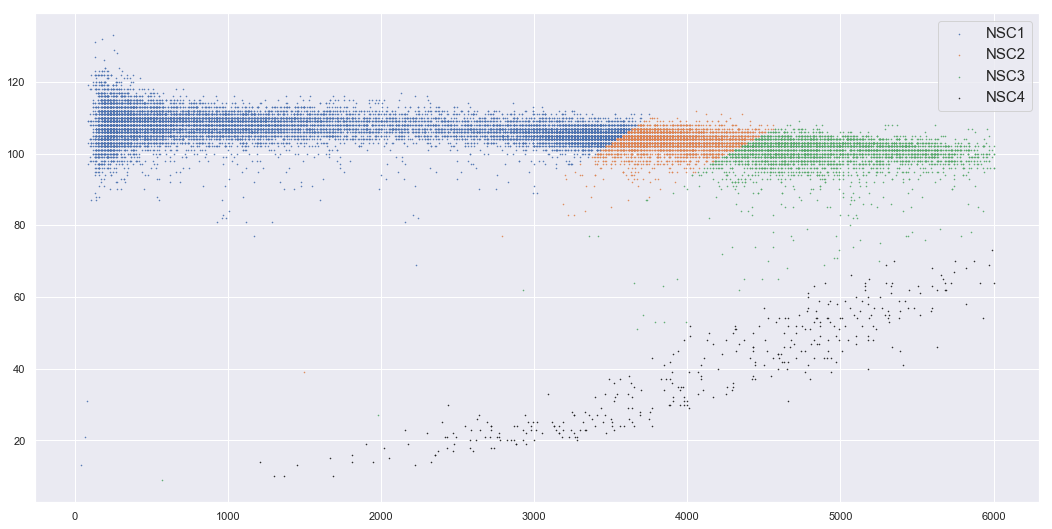

Lq station M7P


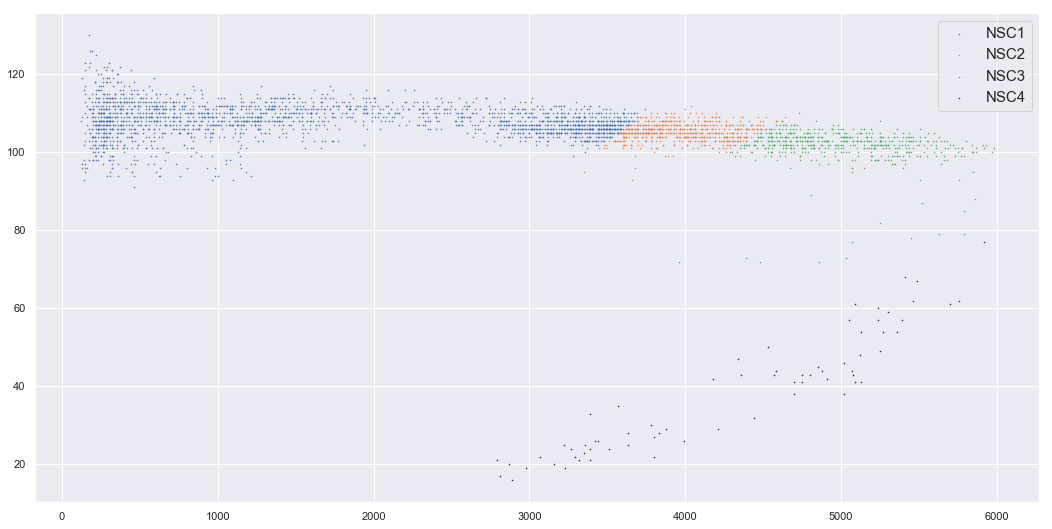

Lq station M7Q


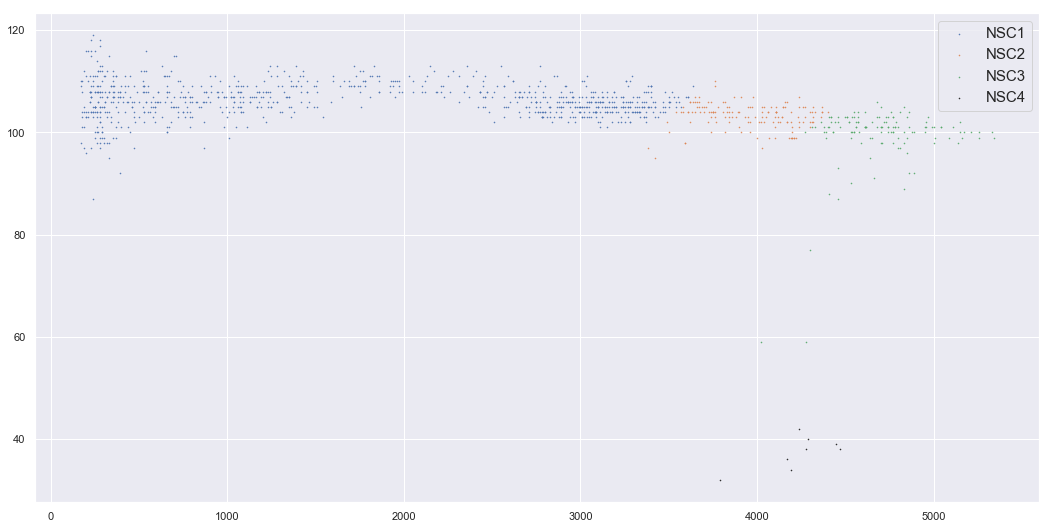

Lq station M7R


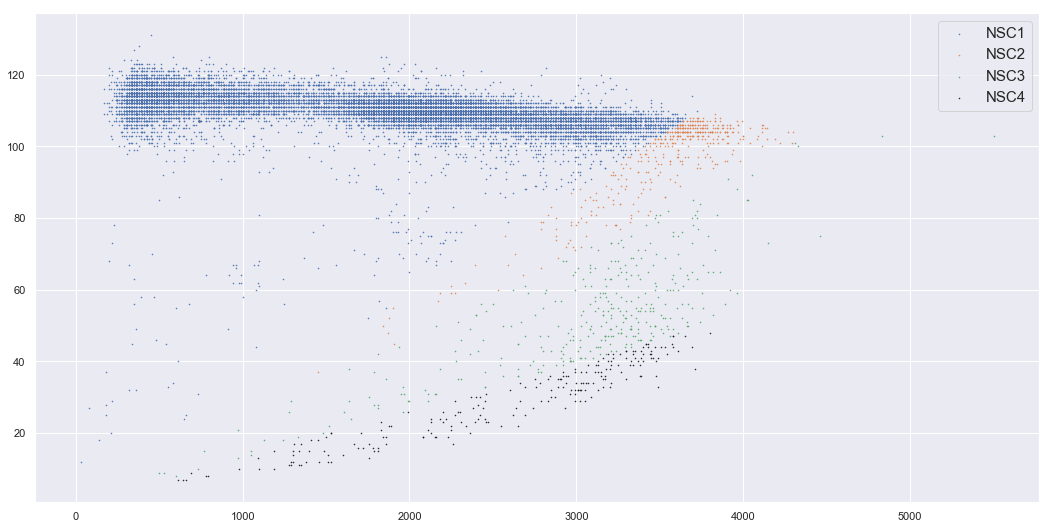

Lq station M7S


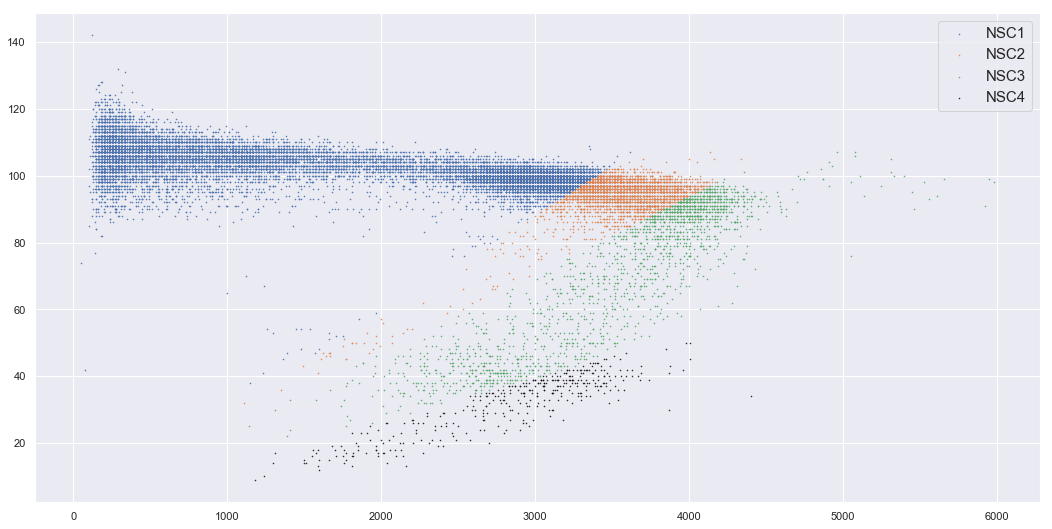

Lq station M7T


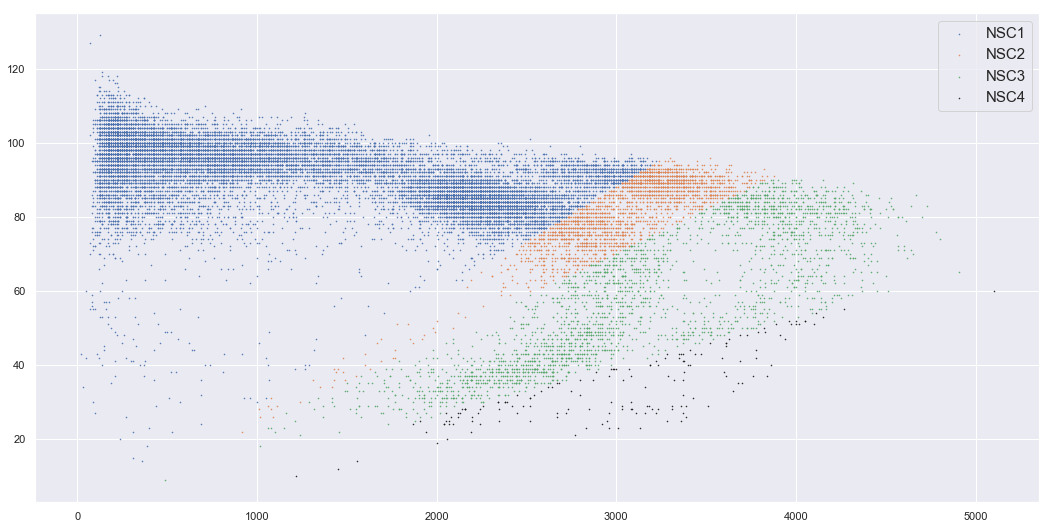

Lq station M7U


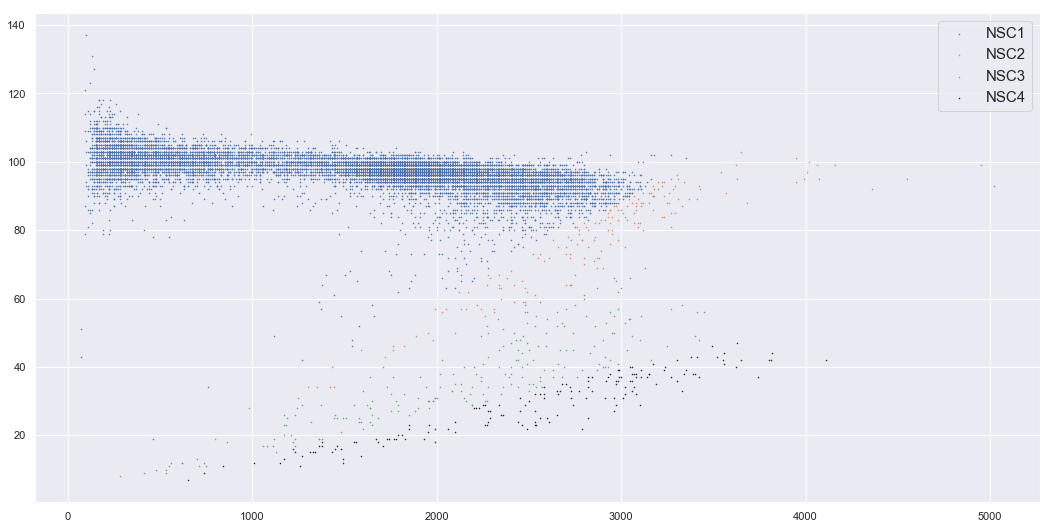

Lq station M7i


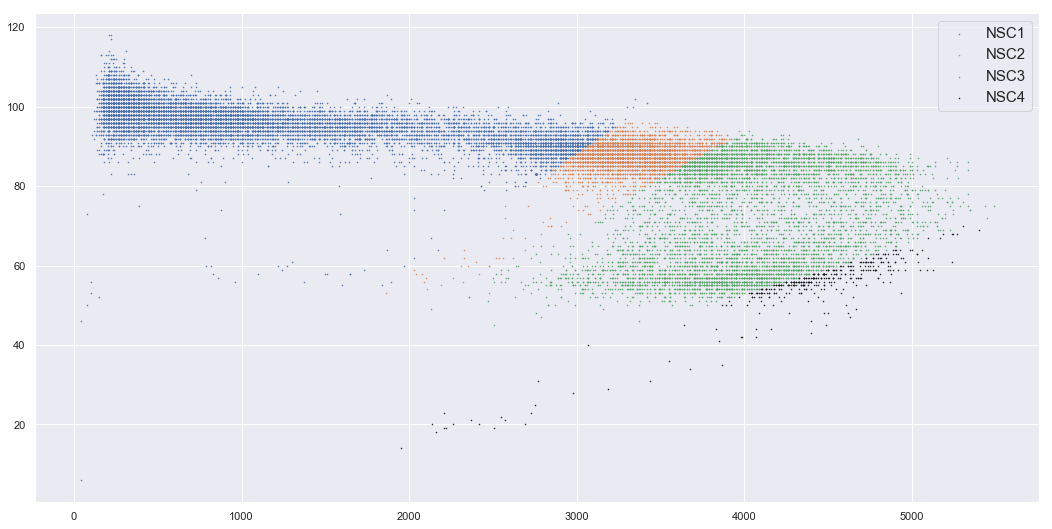

Lq station M7j


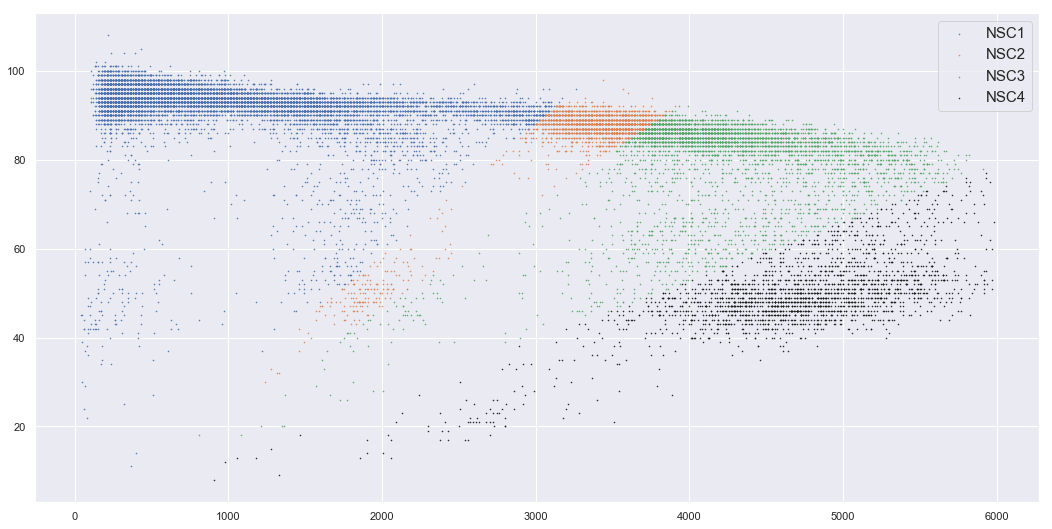

Lq station M7n


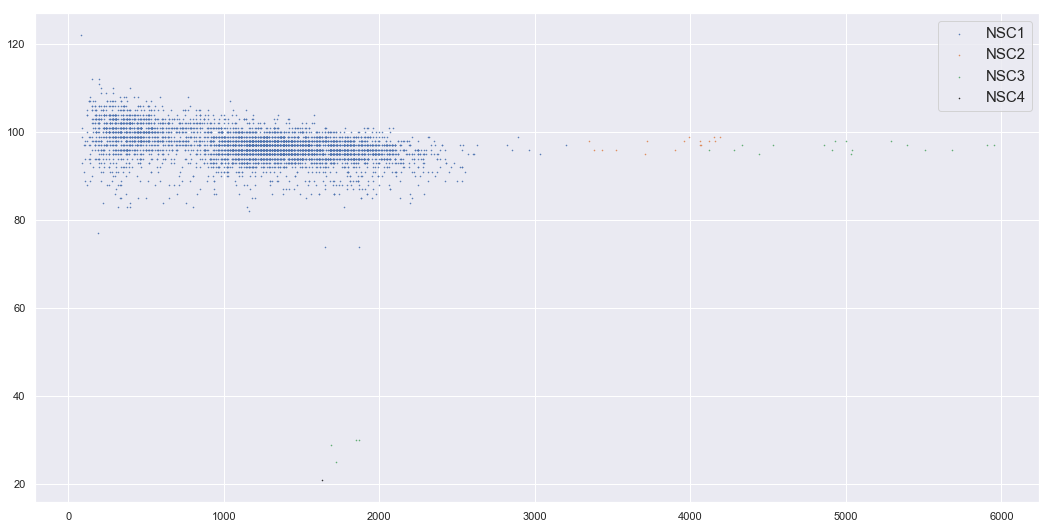

Lq station M7o


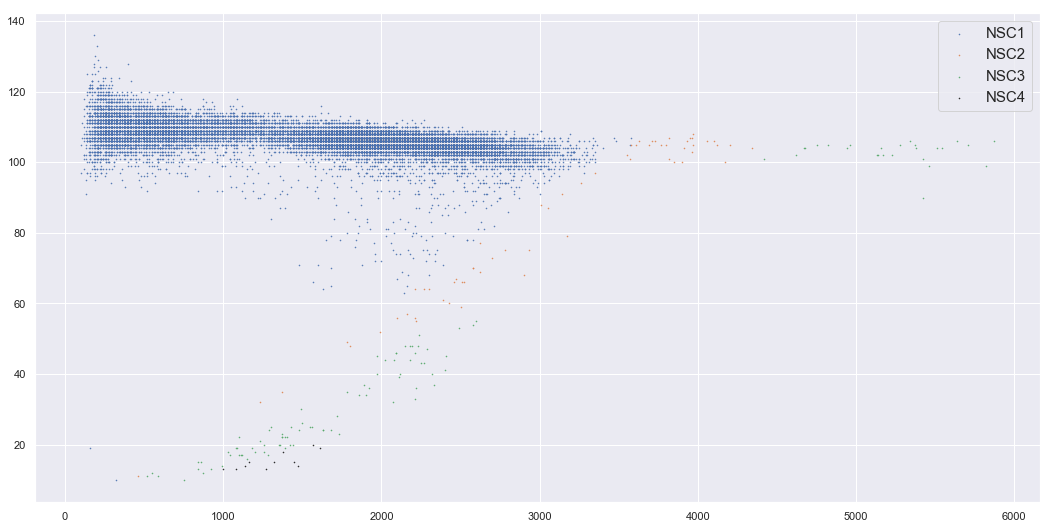

Lq station M7p


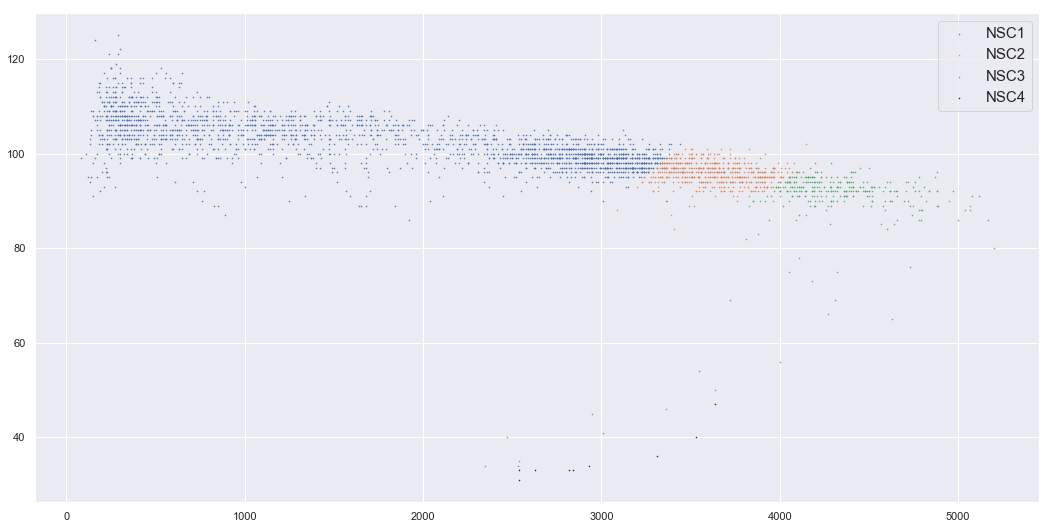

Lq station M7q


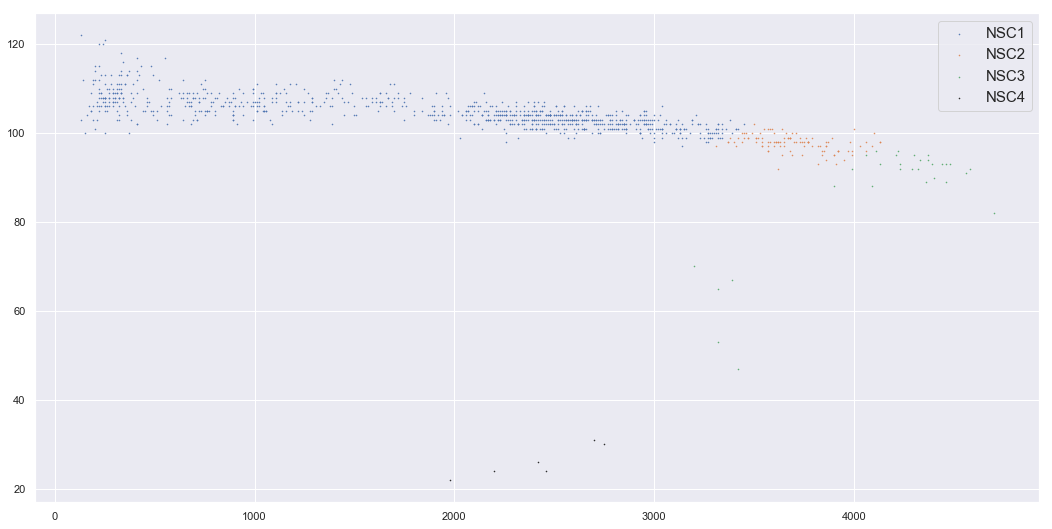

Lq station M7r


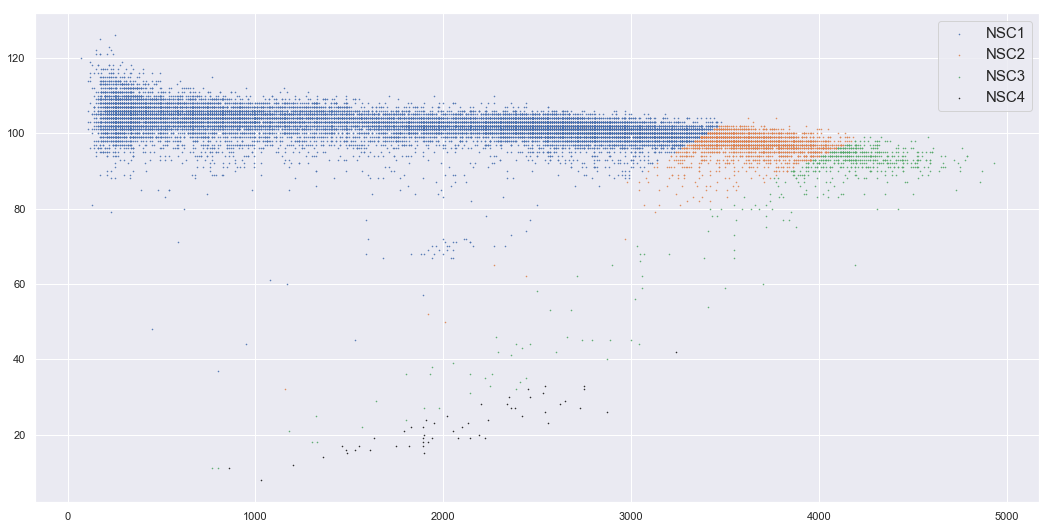

Lq station M7s


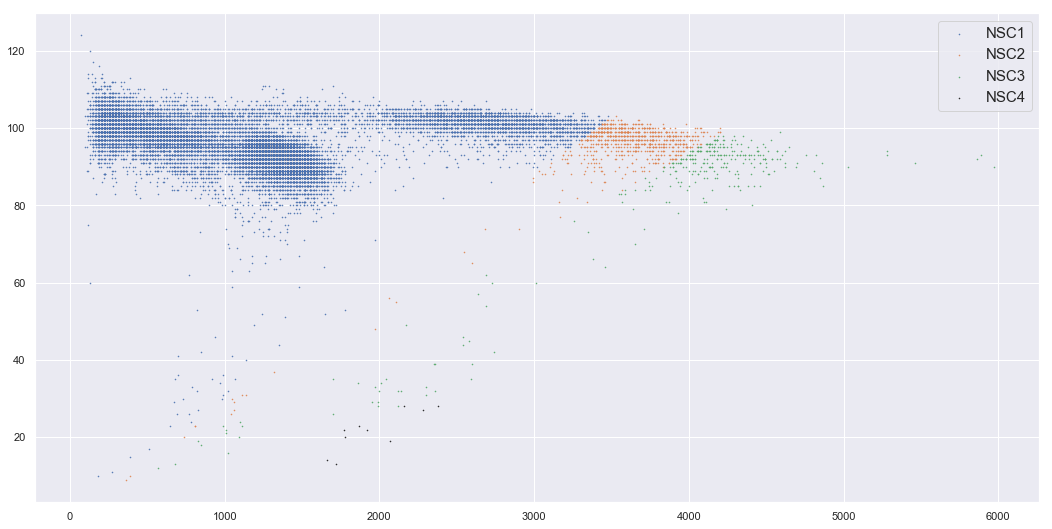

Lq station M7t


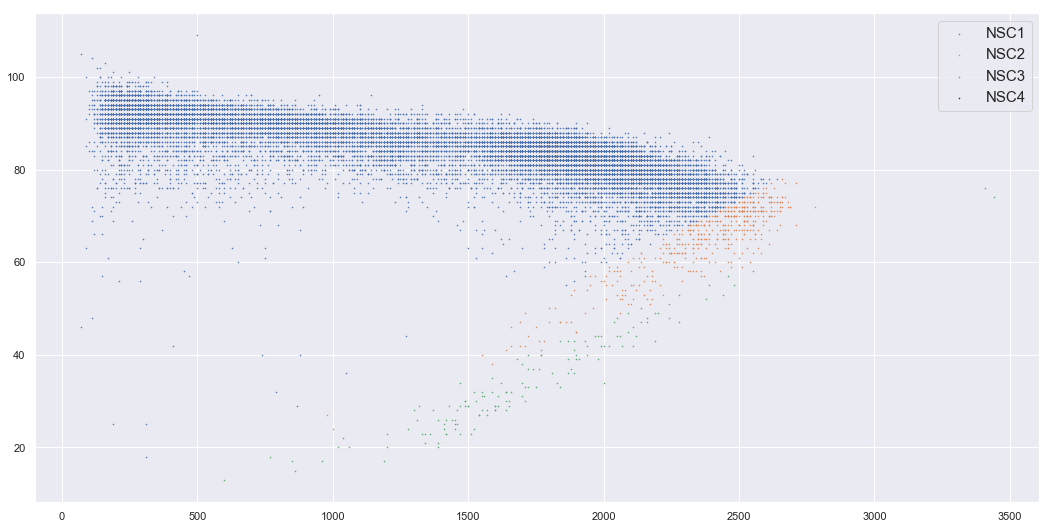

Lq station M7u


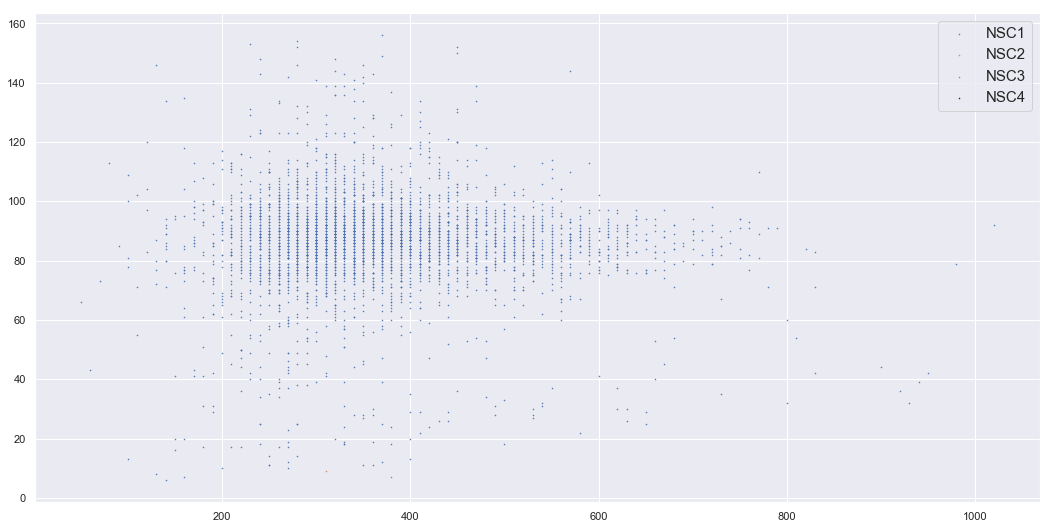

Lq station M8A


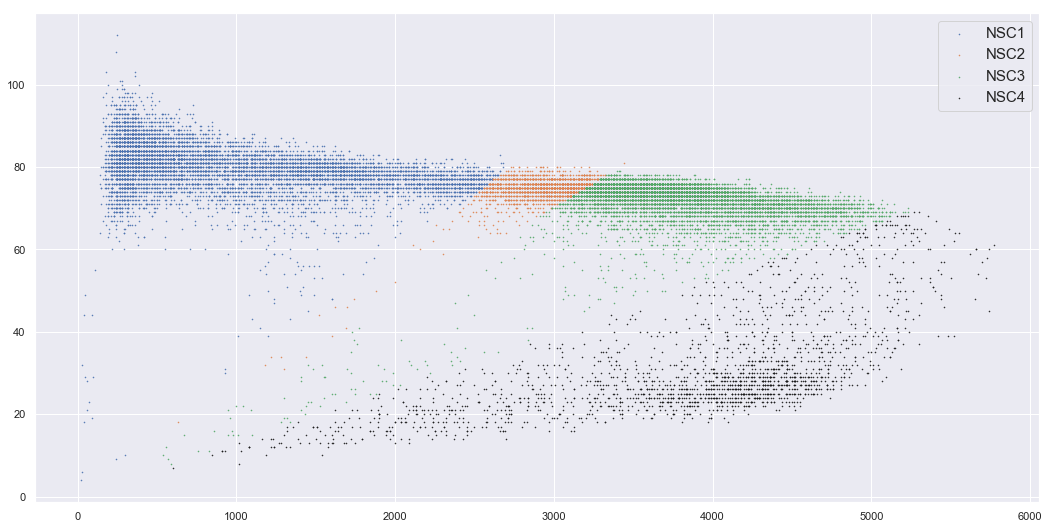

Lq station M8B


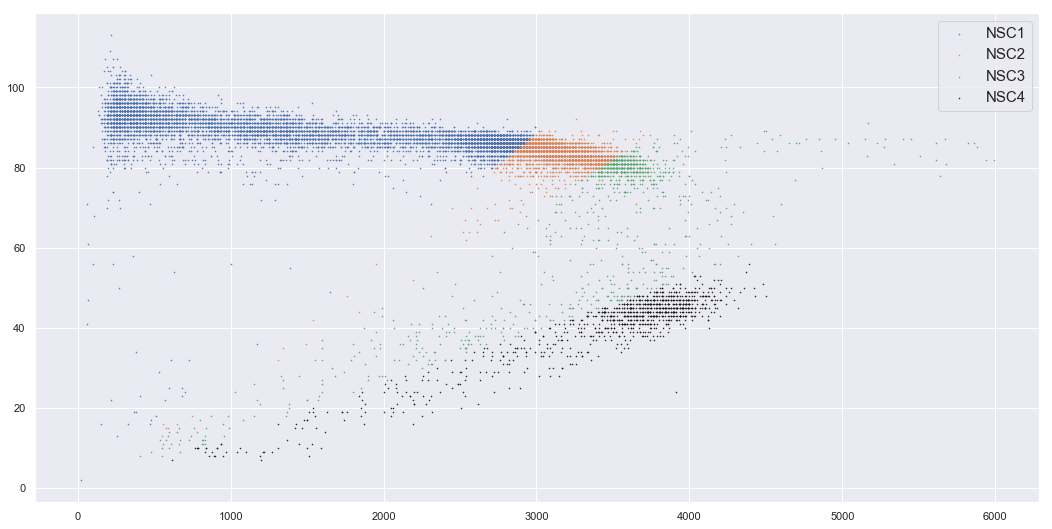

Lq station M8D


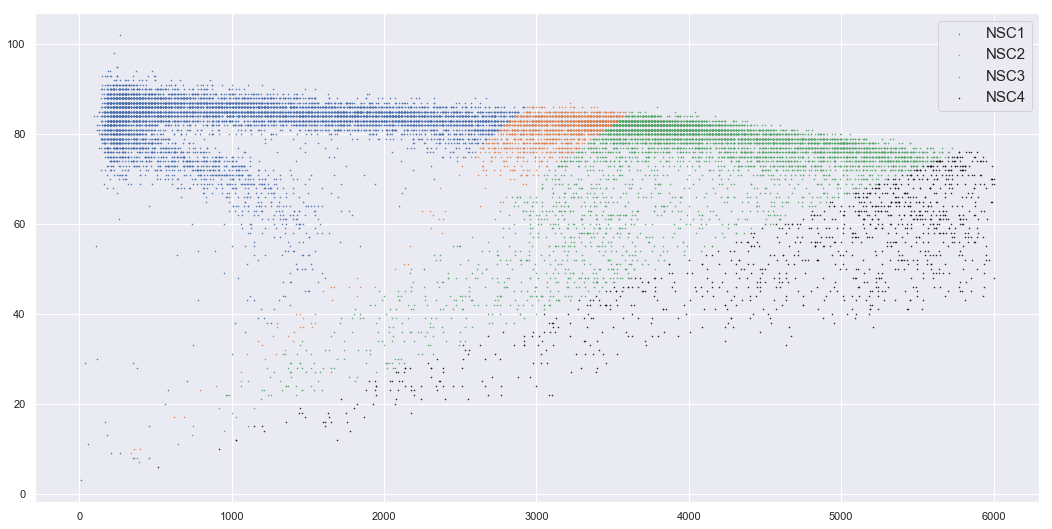

Lq station M8E


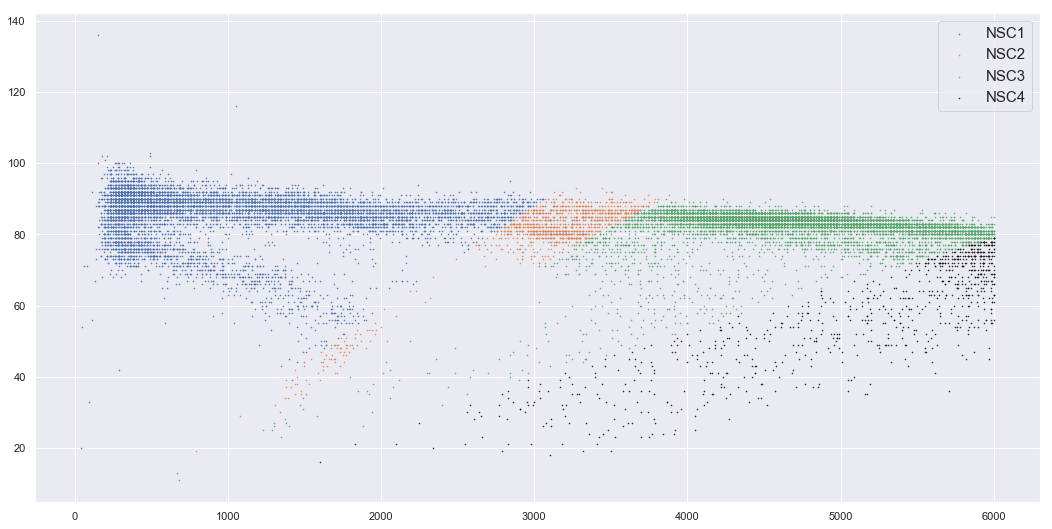

Lq station M8F


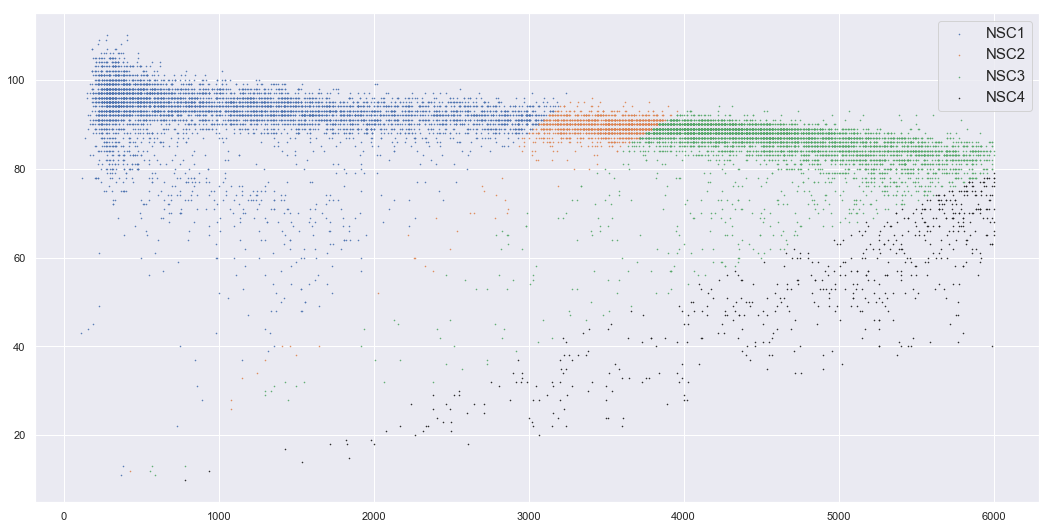

Lq station M8G


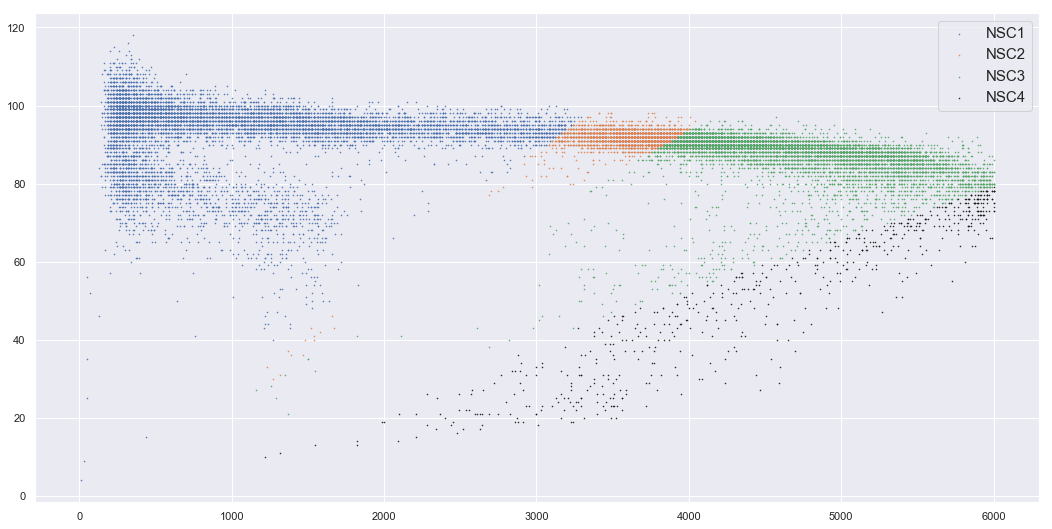

Lq station M8H


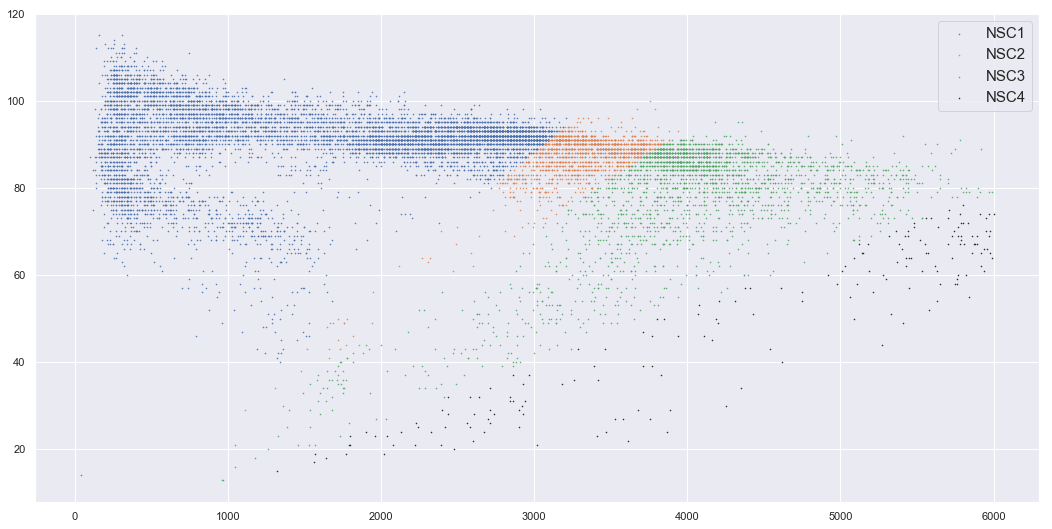

Lq station M8I


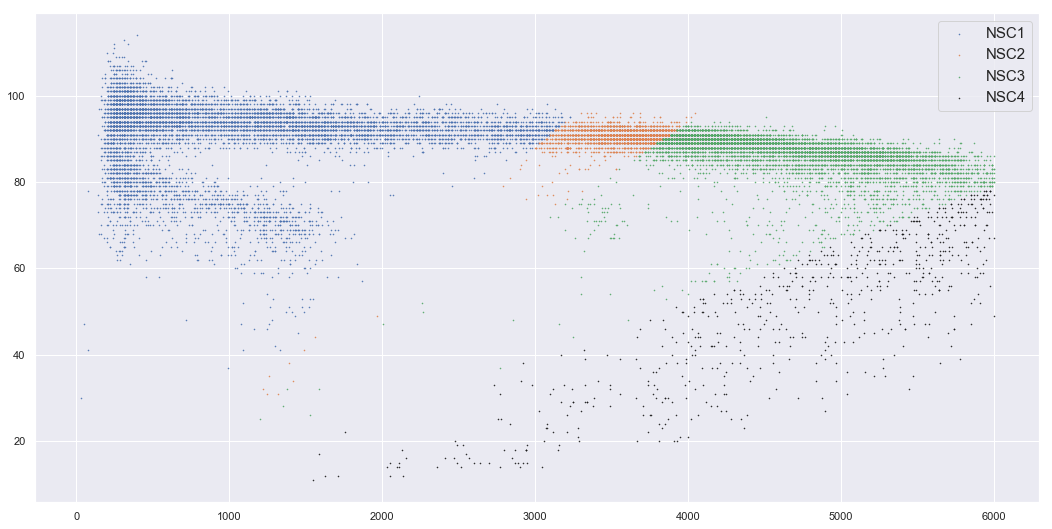

Lq station M8J


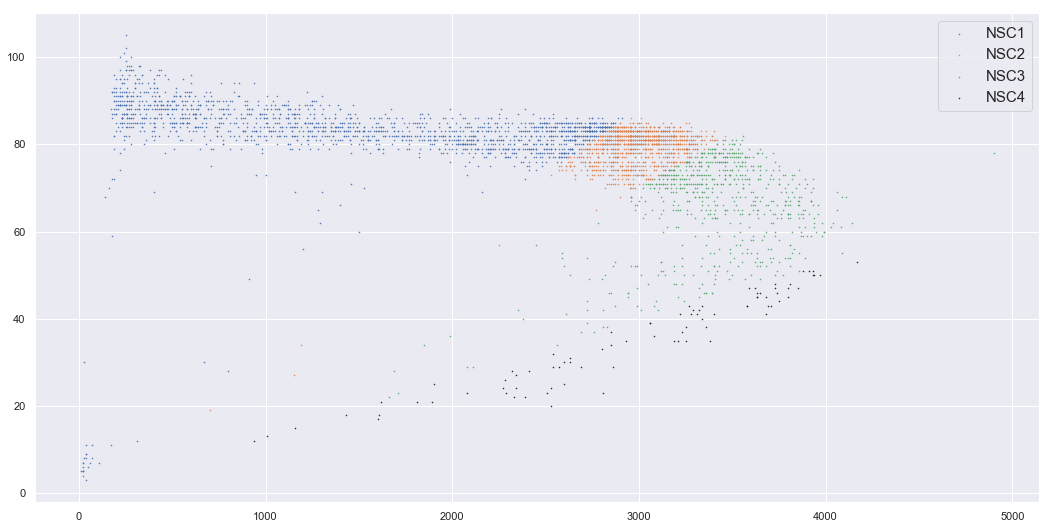

Lq station M8K


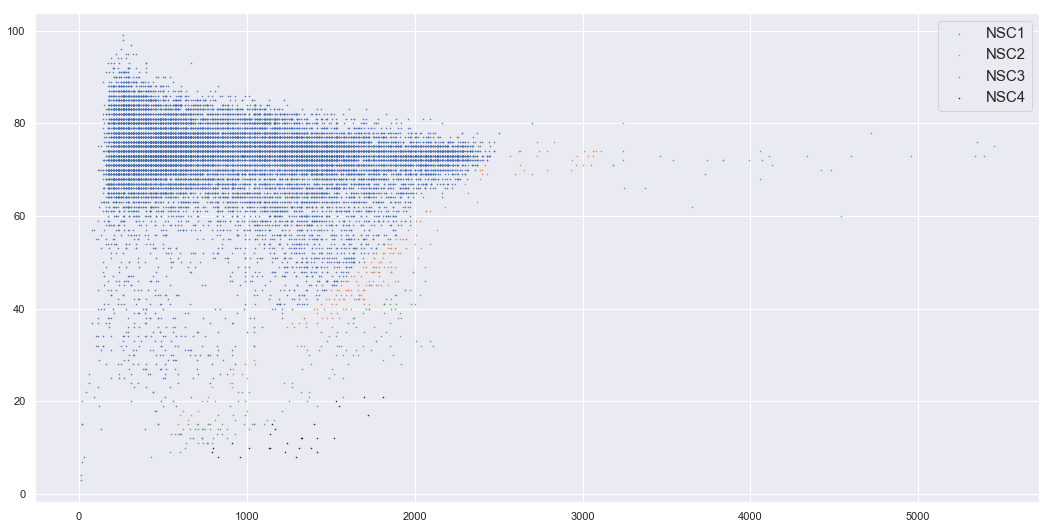

Lq station M8N


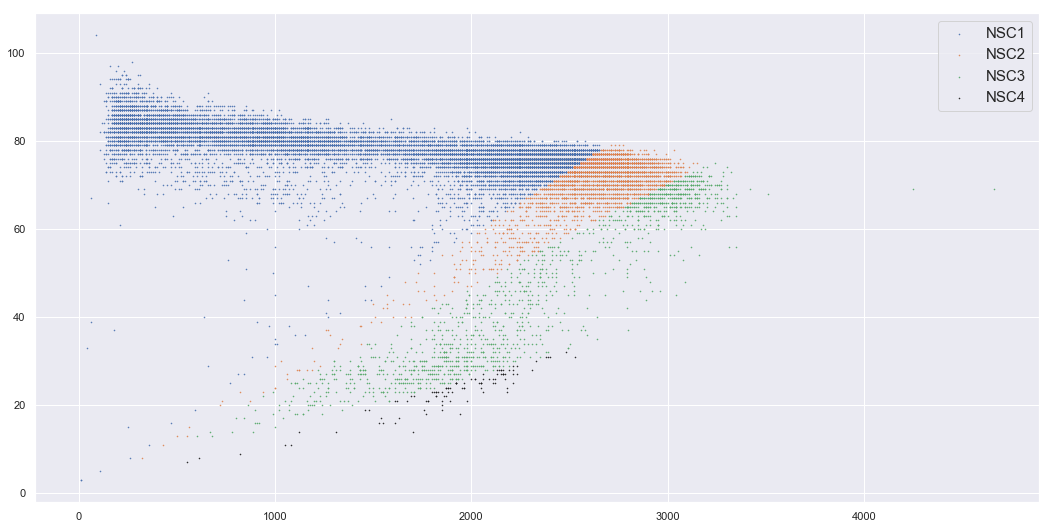

Lq station M8O


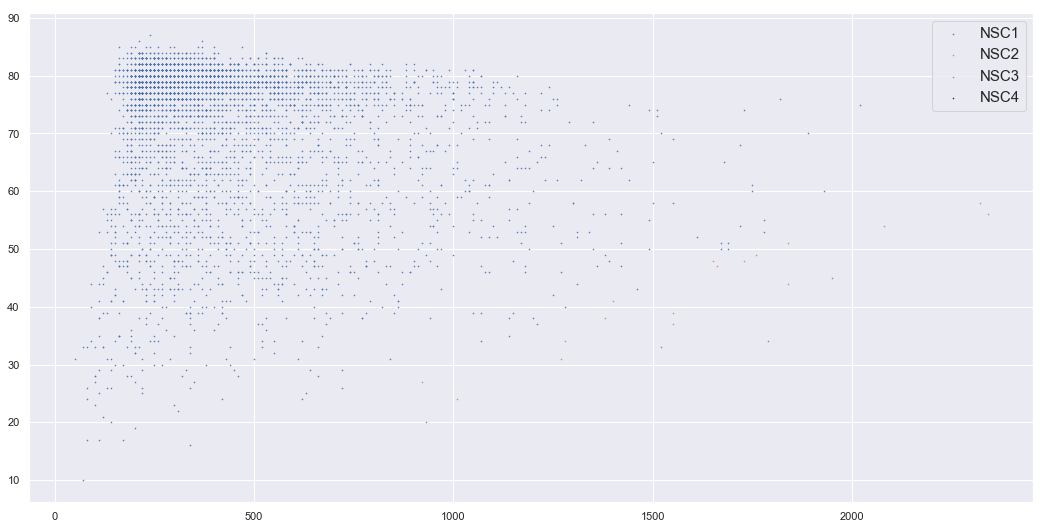

Lq station M8a


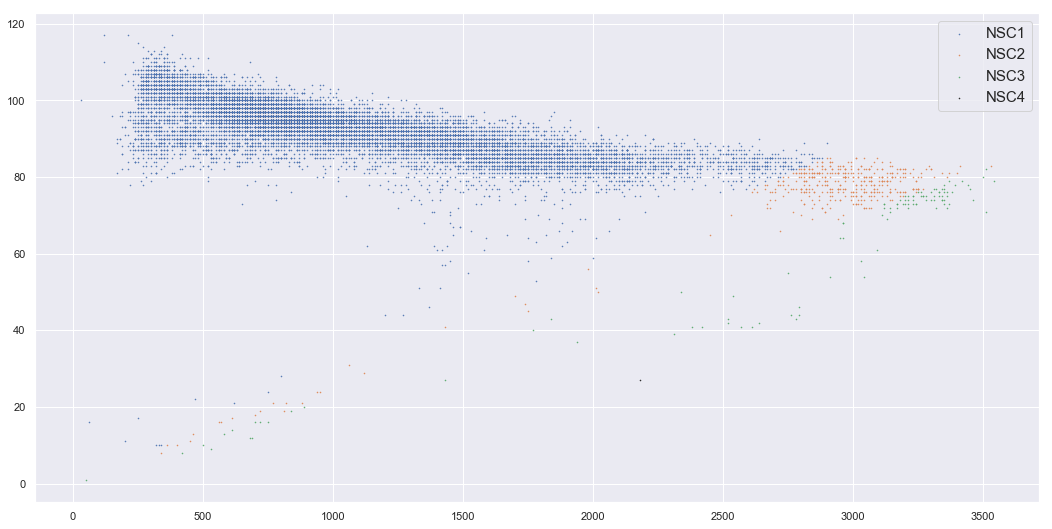

Lq station M8b


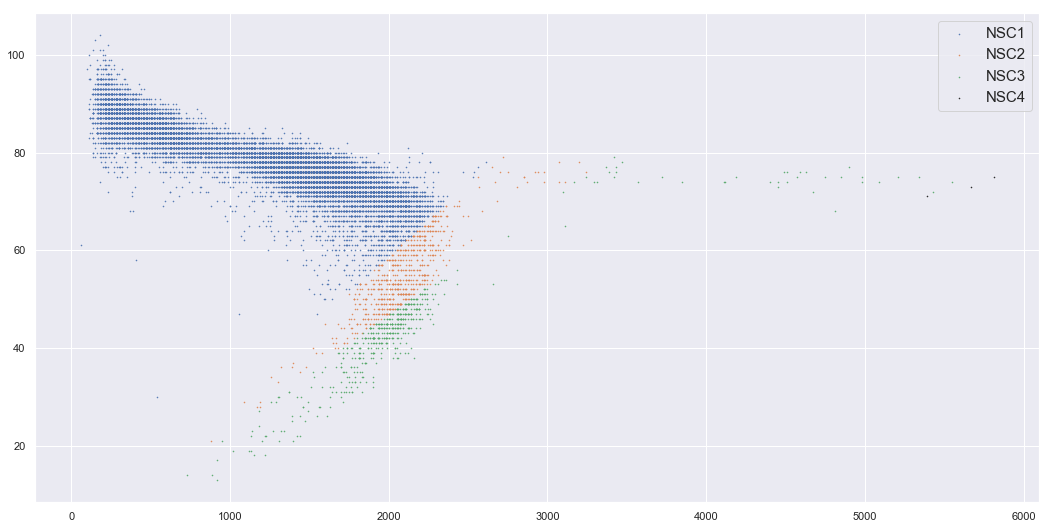

Lq station M8d


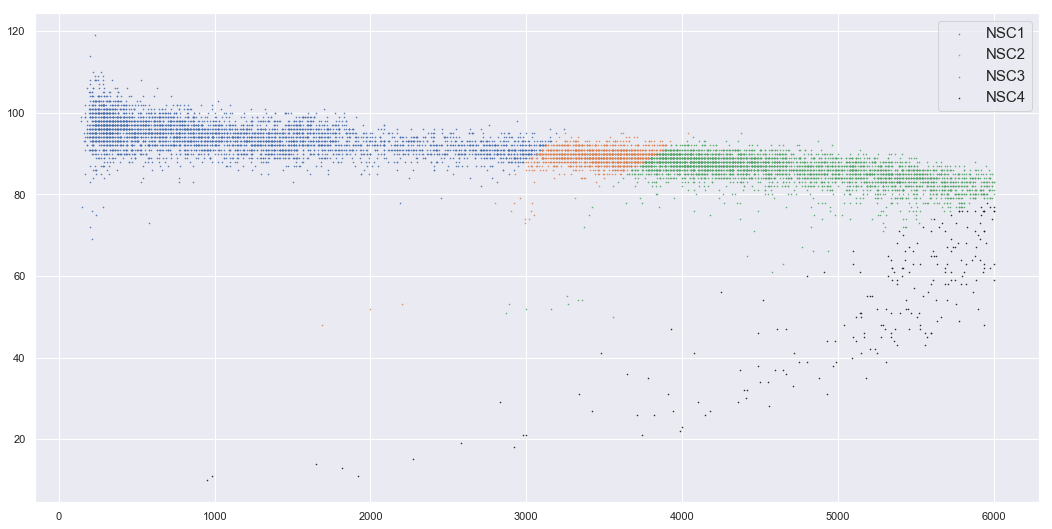

Lq station M8e


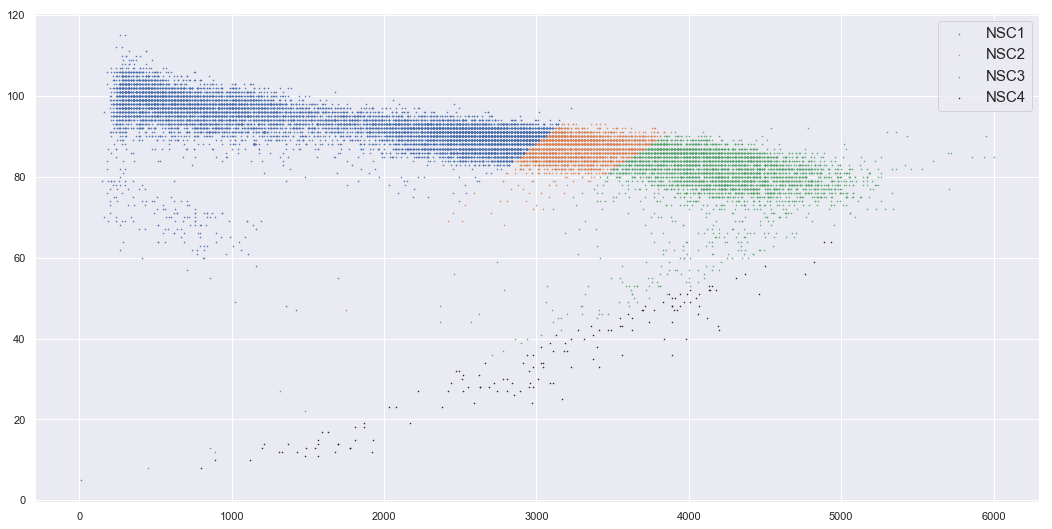

Lq station M8f


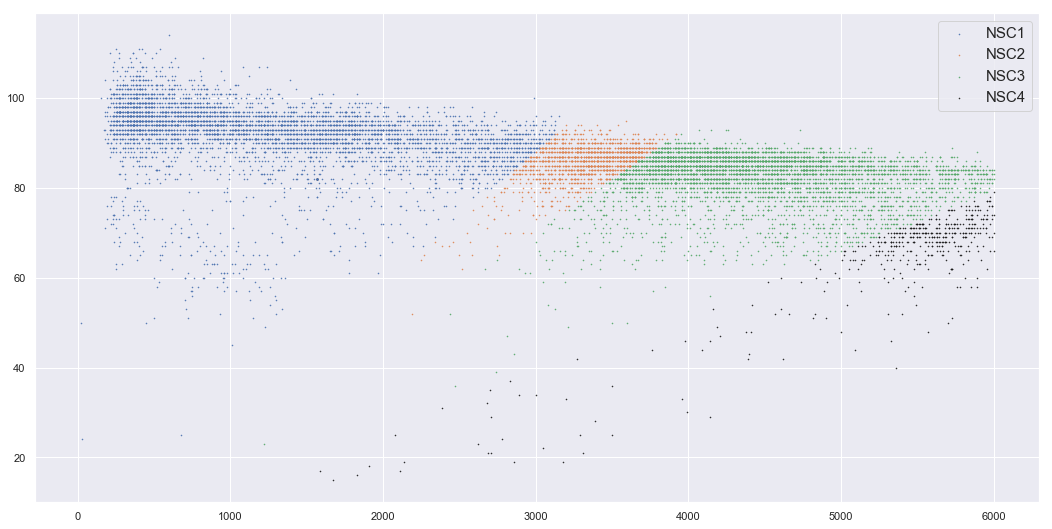

Lq station M8g


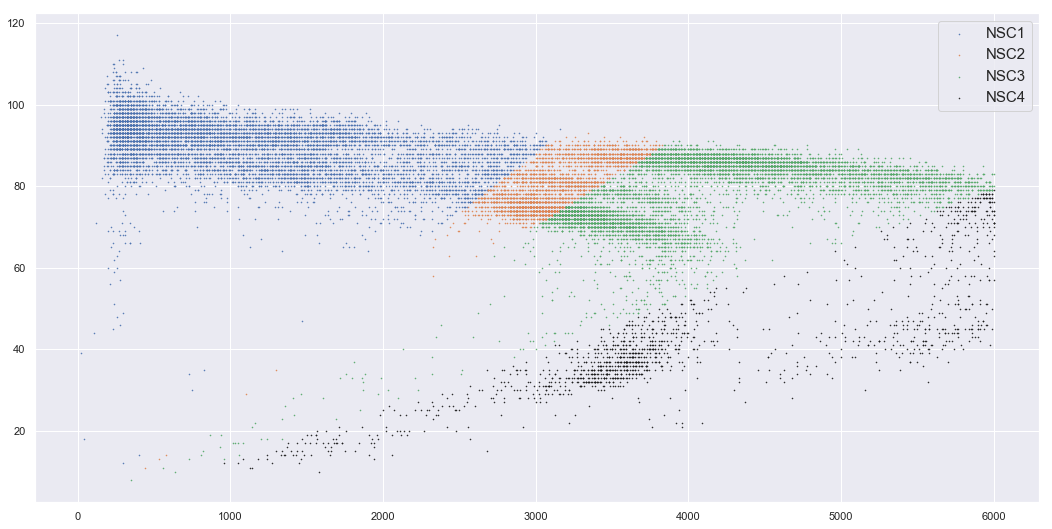

Lq station M8h


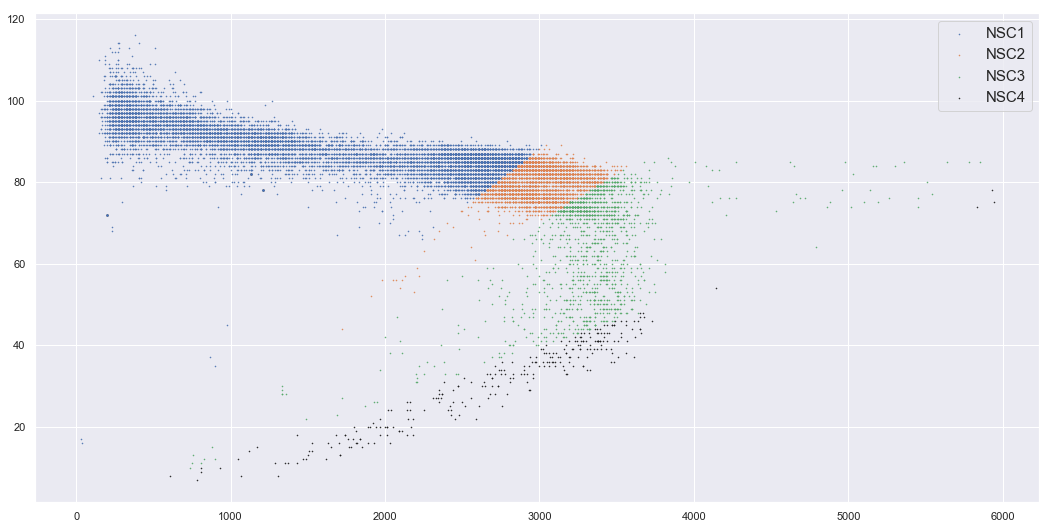

Lq station M8i


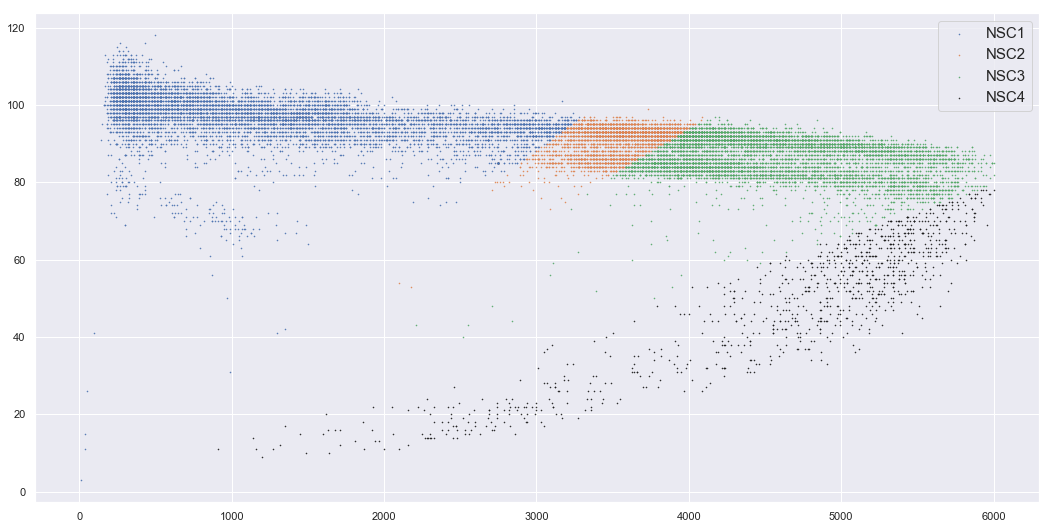

Lq station M8j


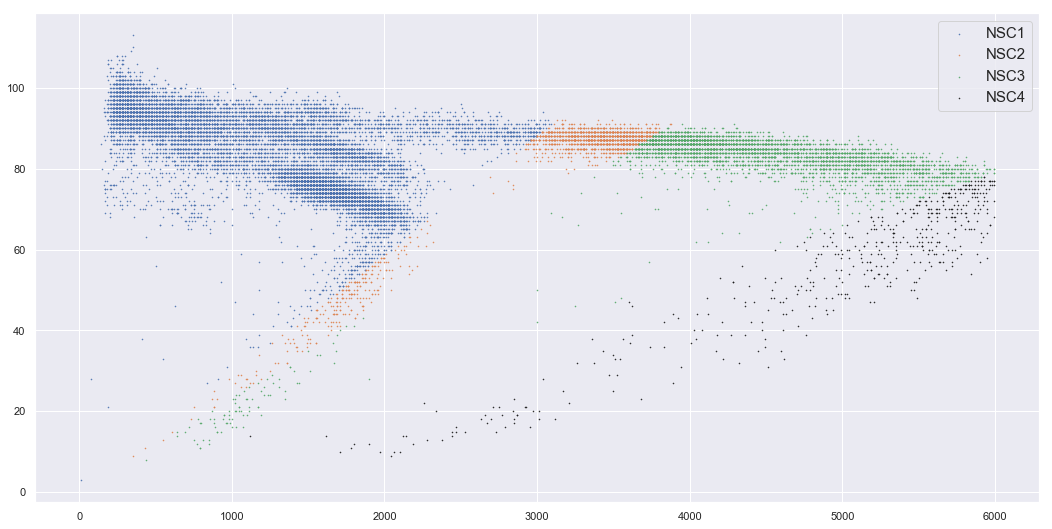

Lq station M8k


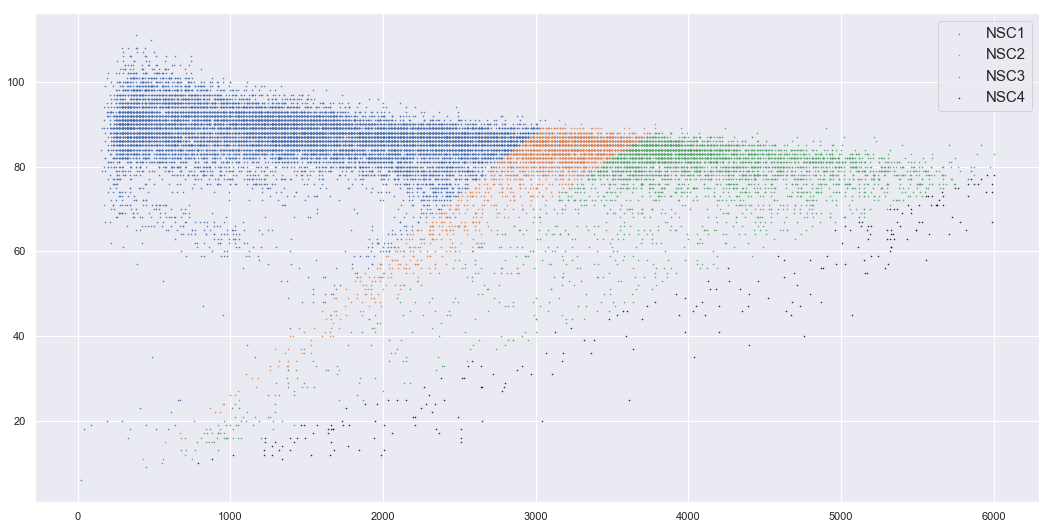

Lq station M8n


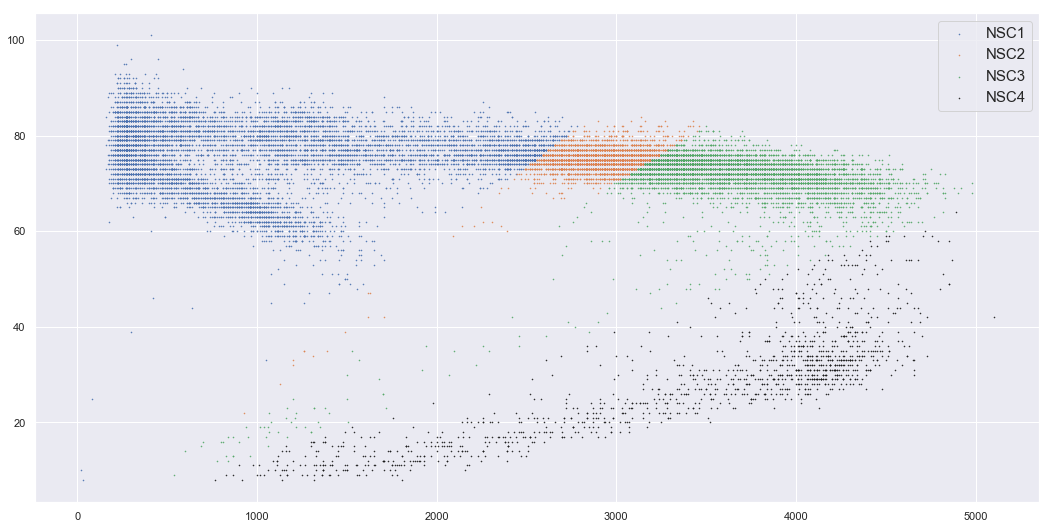

Lq station M8o


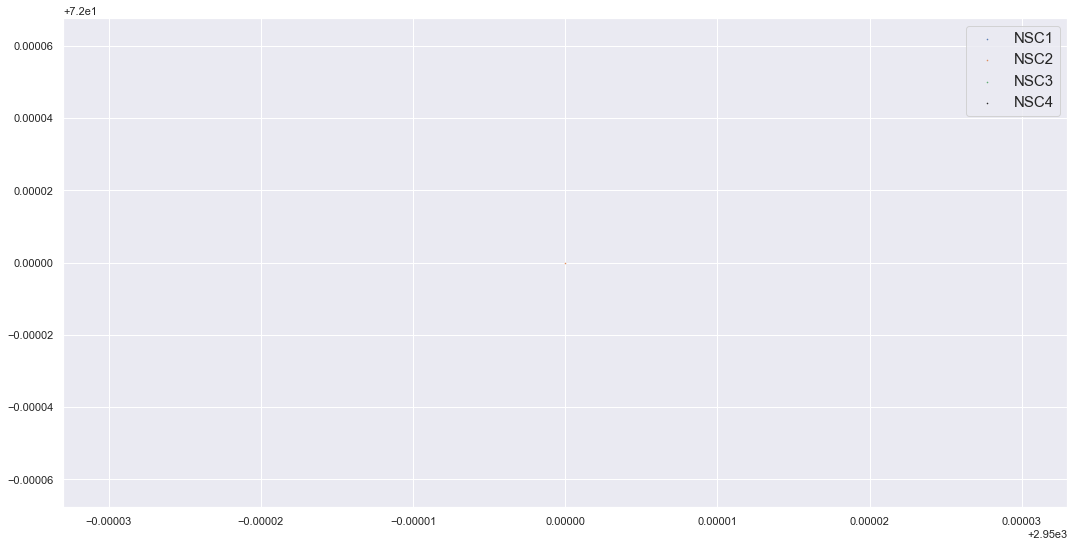

In [58]:
import pylab as plot
for i in range(44):
    fig = plt.figure(figsize=(18,9))
    ax1 = fig.add_subplot(111)
    ax1.scatter(NSC1[i]['Q'], NSC1[i]['Vitesse'], s=.3, label='NSC1')
    ax1.scatter(NSC2[i]['Q'], NSC2[i]['Vitesse'], s=.3, label='NSC2')
    ax1.scatter(NSC3[i]['Q'], NSC3[i]['Vitesse'], s=.3, label='NSC3')
    ax1.scatter(NSC4[i]['Q'], NSC4[i]['Vitesse'], s=.3, c = 'k', label='NSC4')
    print('La station',keys[i])
    #plt.title('La station M8k',fontsize = 18,keys[i])
    plt.legend(loc='upper right',prop={'size': 15});
    plt.show()

La station M7I


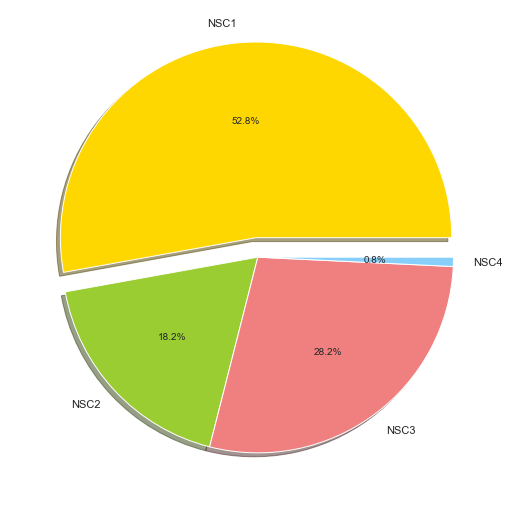

La station M7J


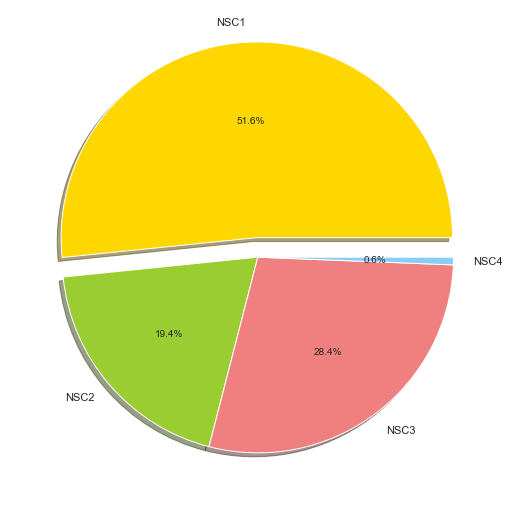

La station M7N


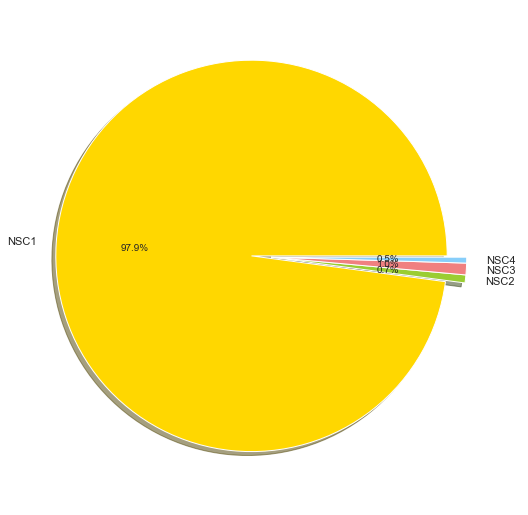

La station M7O


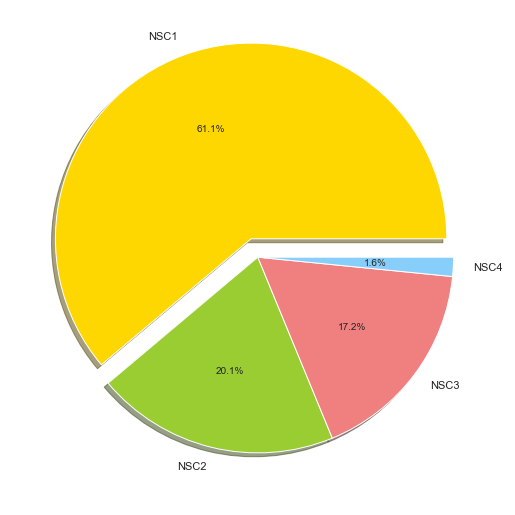

La station M7P


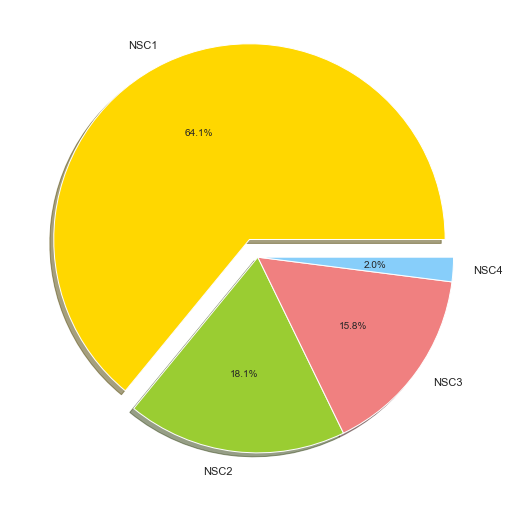

La station M7Q


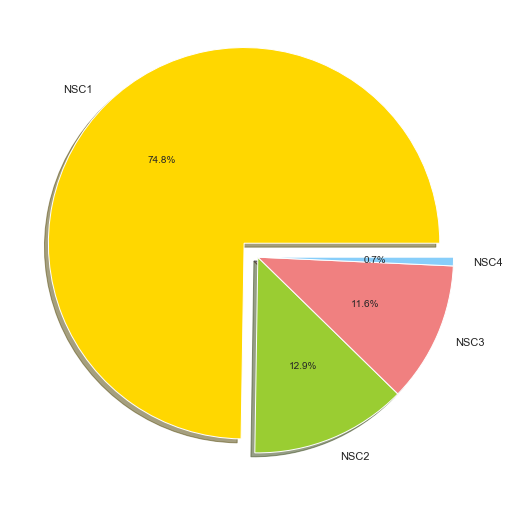

La station M7R


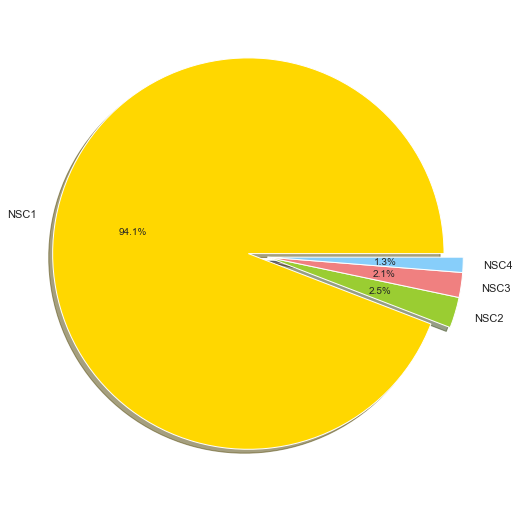

La station M7S


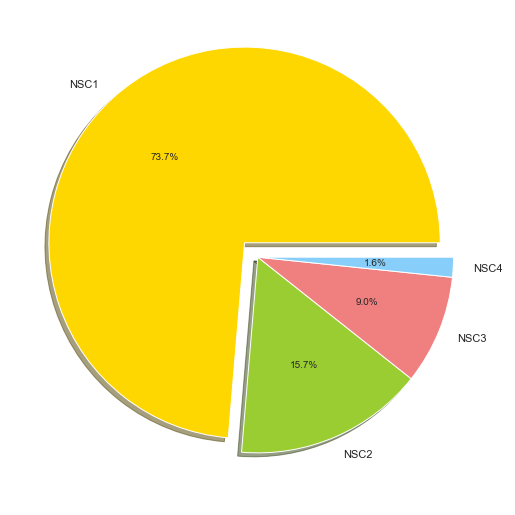

La station M7T


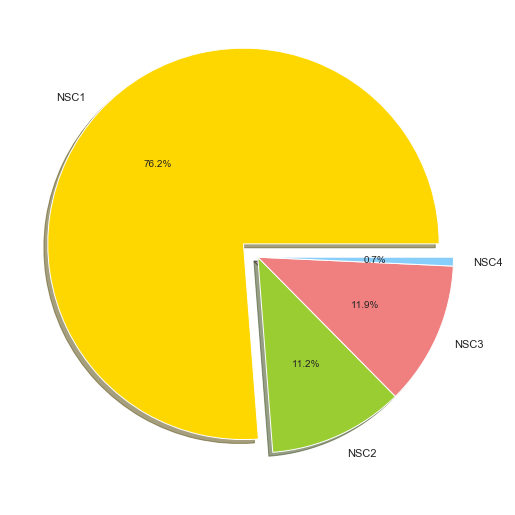

La station M7U


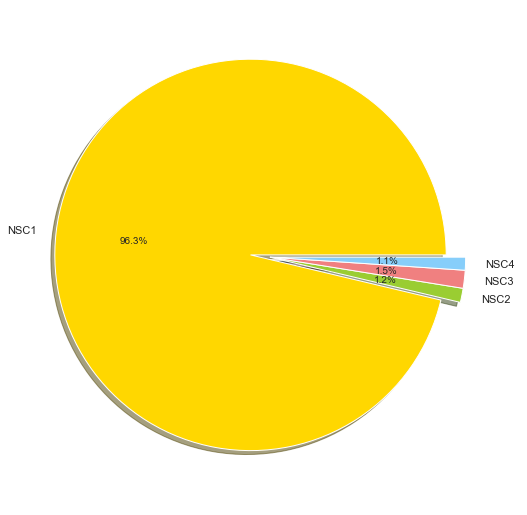

La station M7i


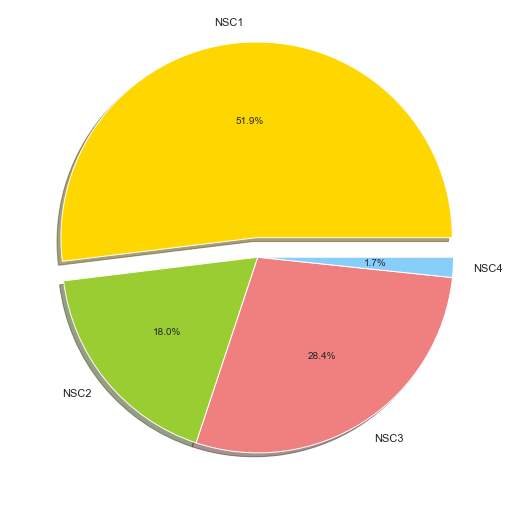

La station M7j


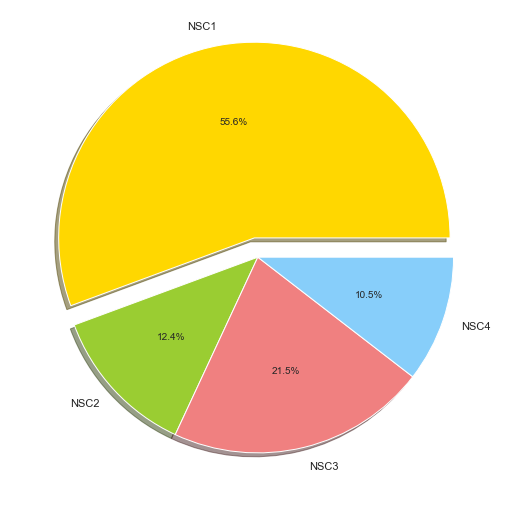

La station M7n


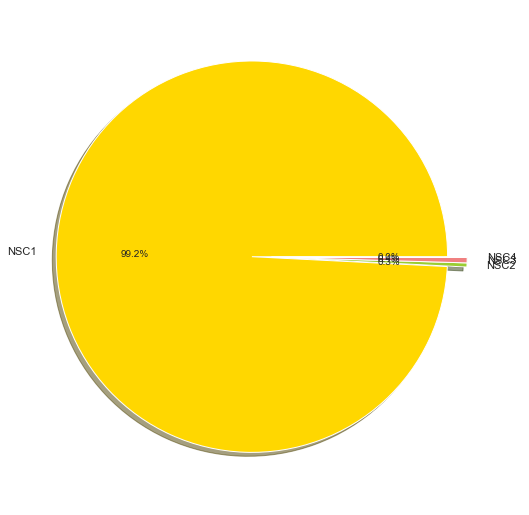

La station M7o


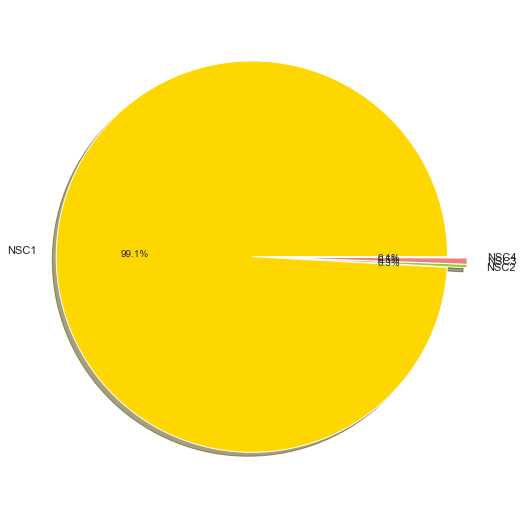

La station M7p


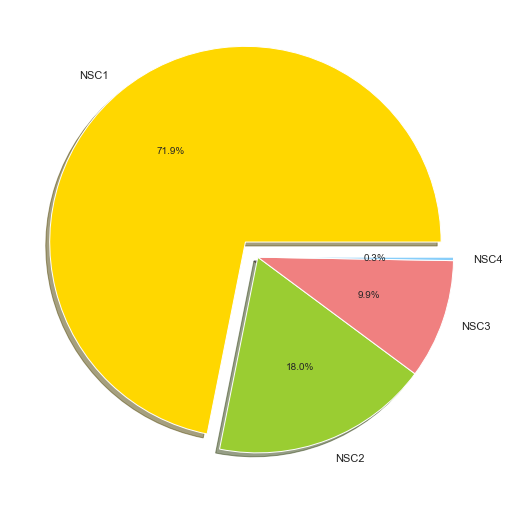

La station M7q


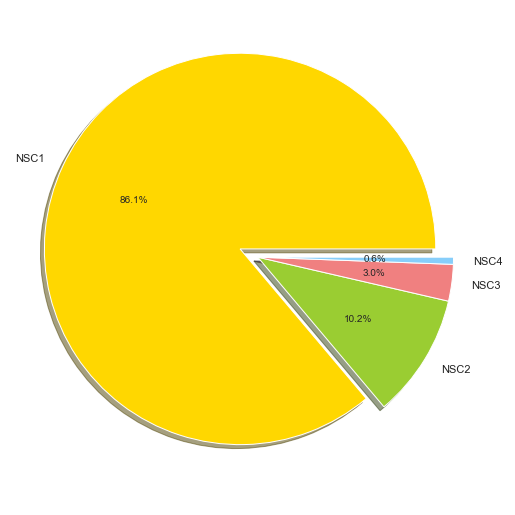

La station M7r


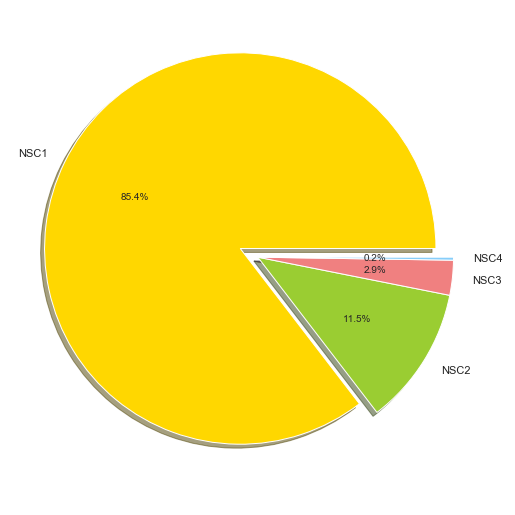

La station M7s


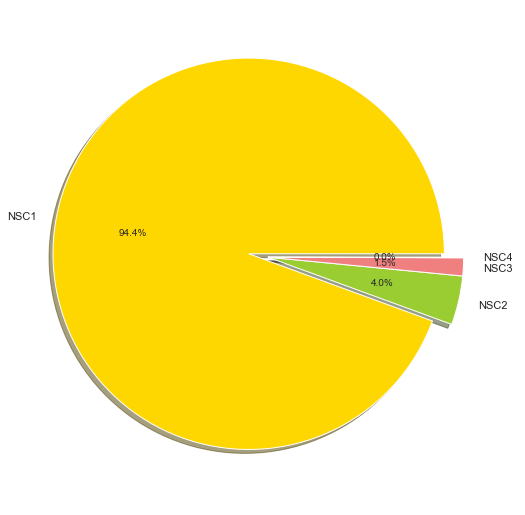

La station M7t


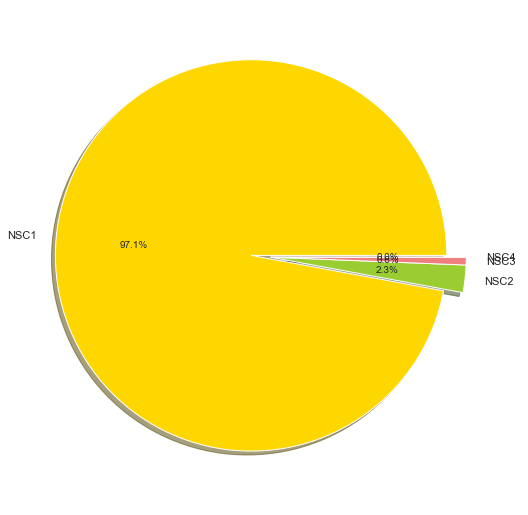

La station M7u


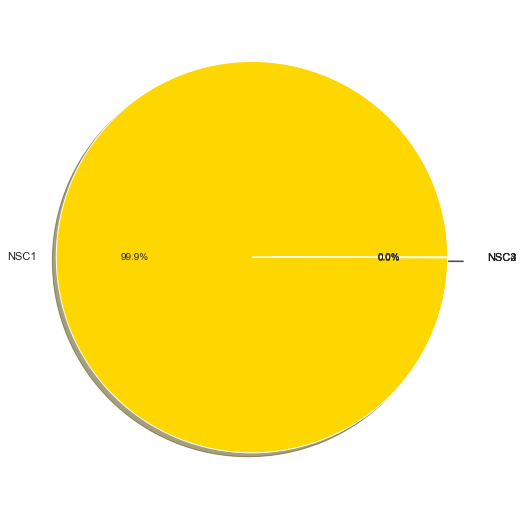

La station M8A


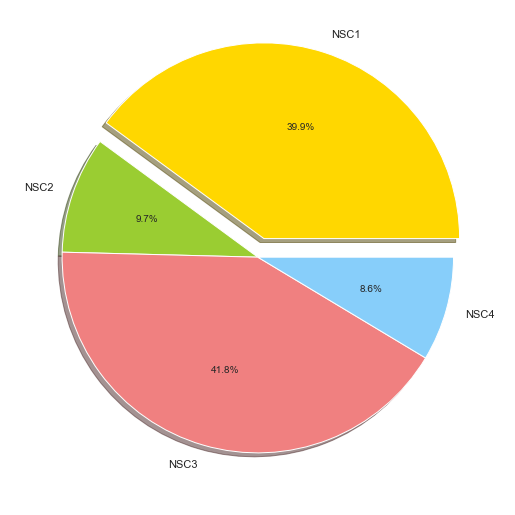

La station M8B


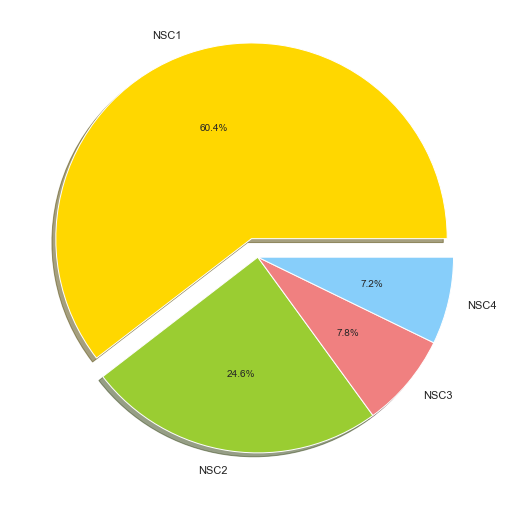

La station M8D


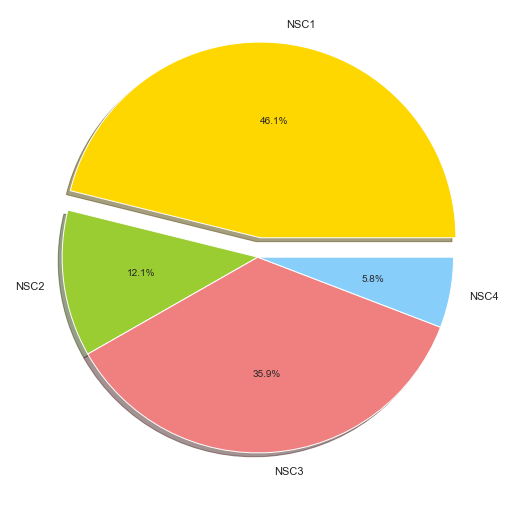

La station M8E


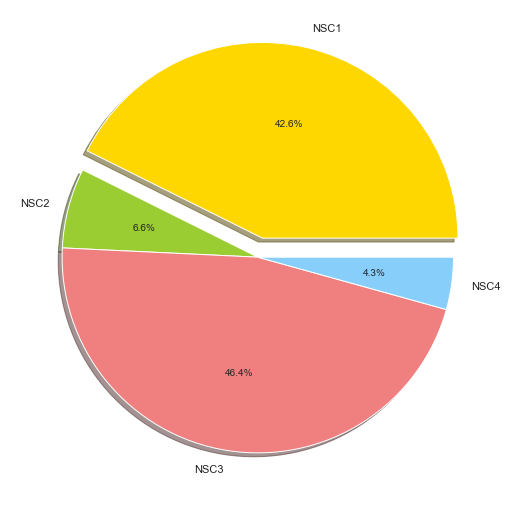

La station M8F


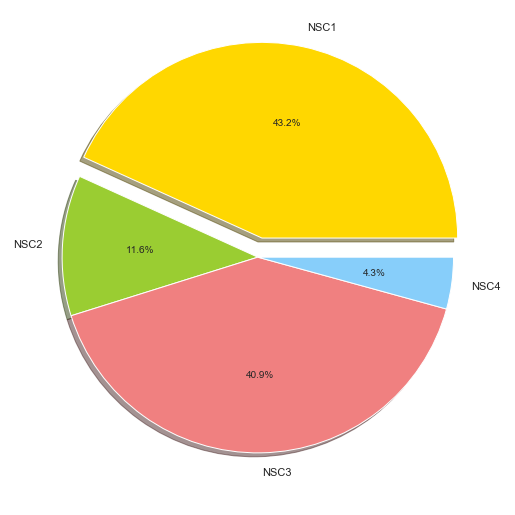

La station M8G


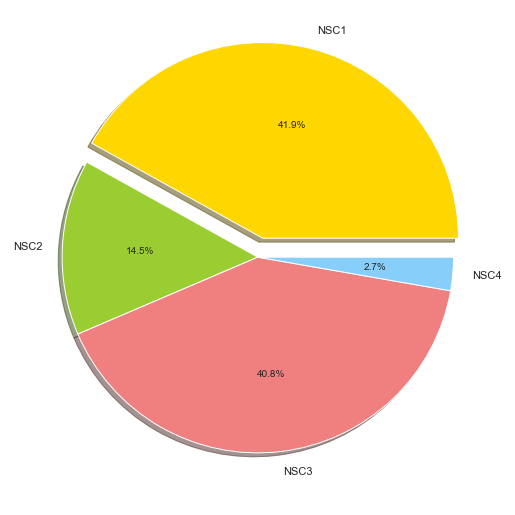

La station M8H


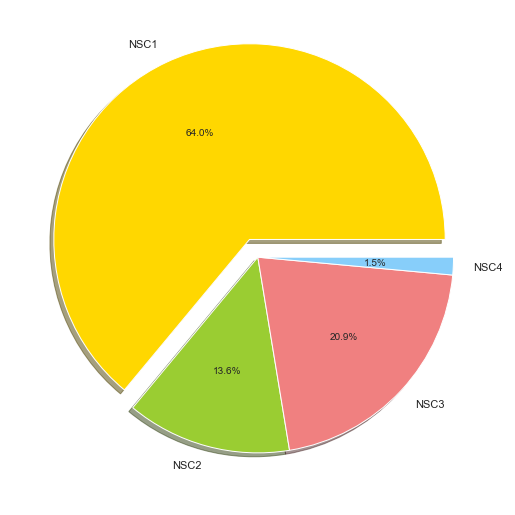

La station M8I


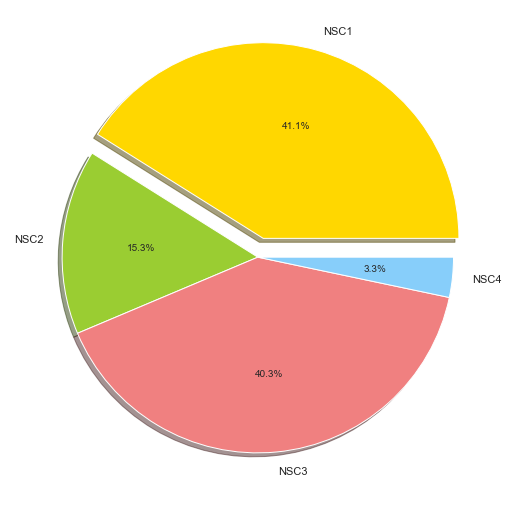

La station M8J


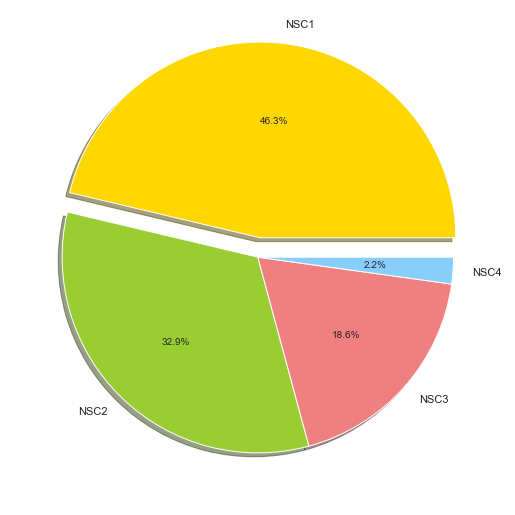

La station M8K


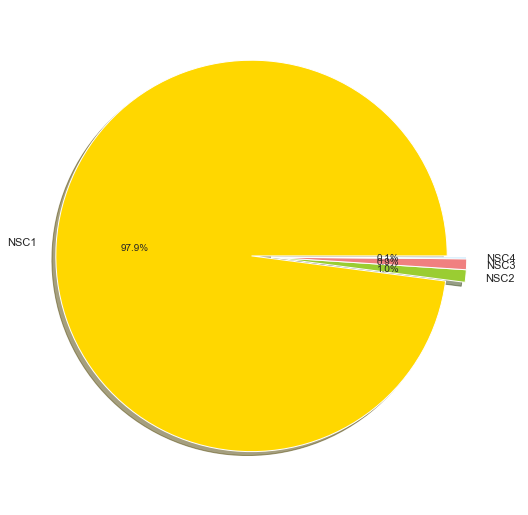

La station M8N


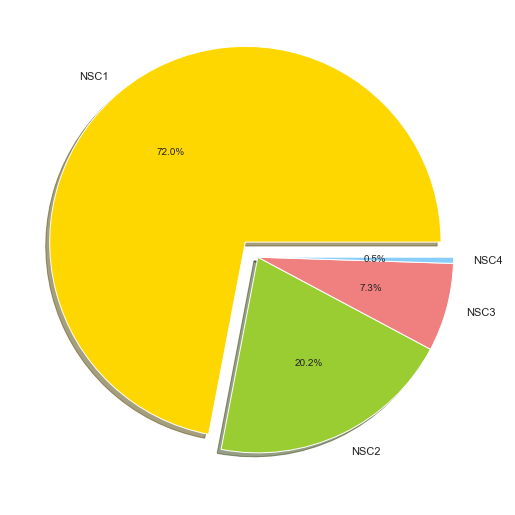

La station M8O


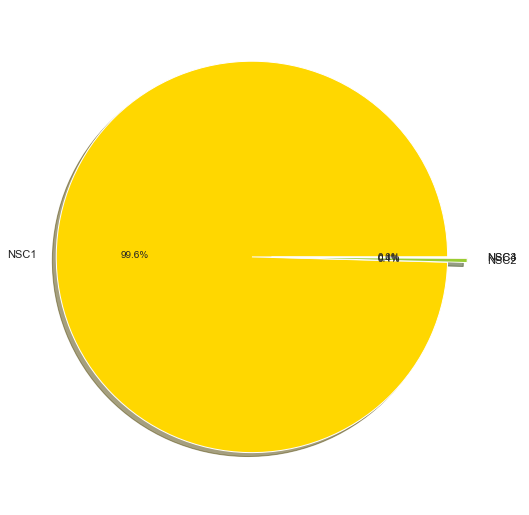

La station M8a


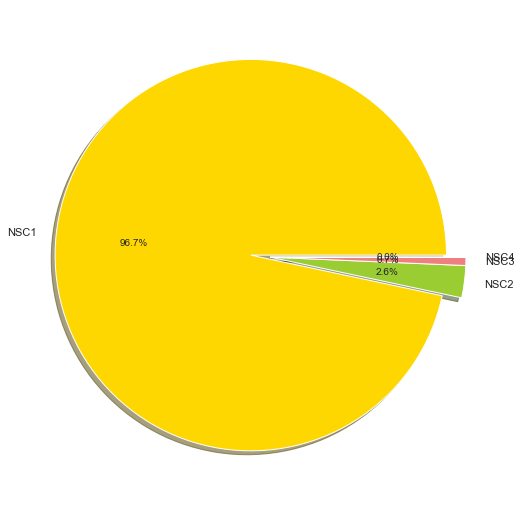

La station M8b


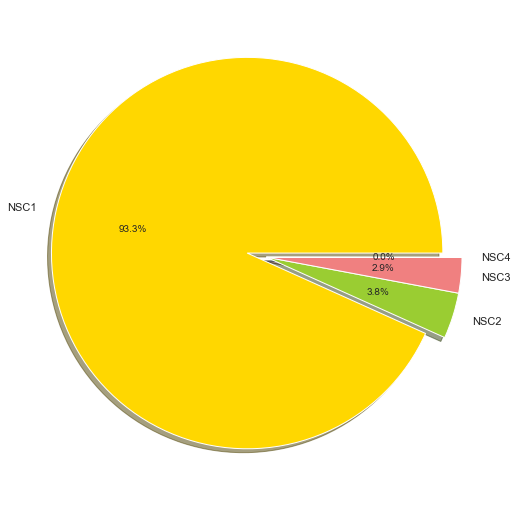

La station M8d


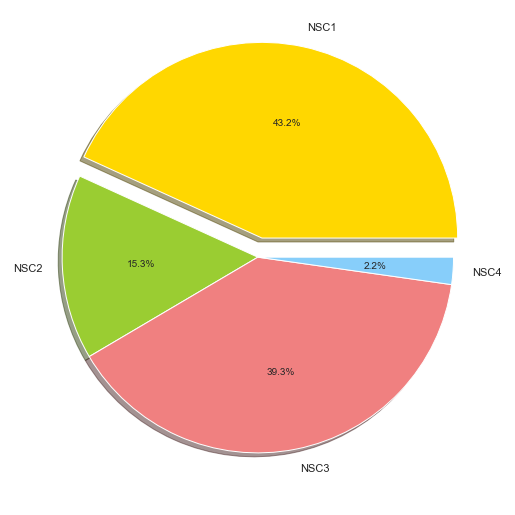

La station M8e


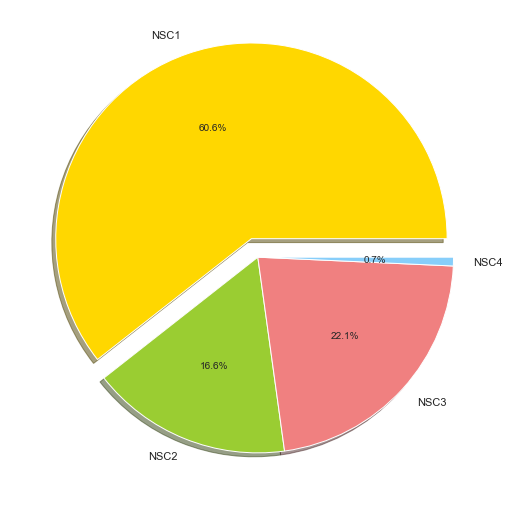

La station M8f


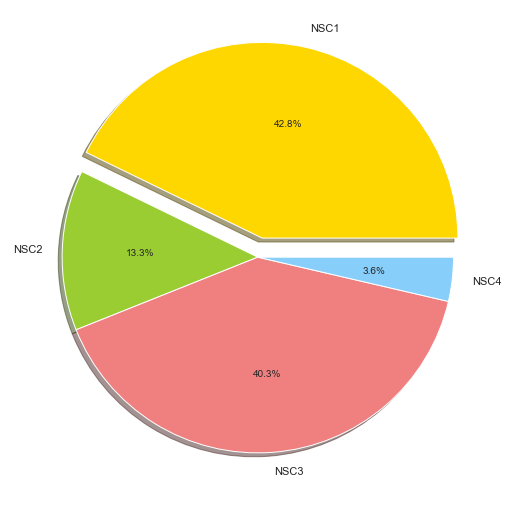

La station M8g


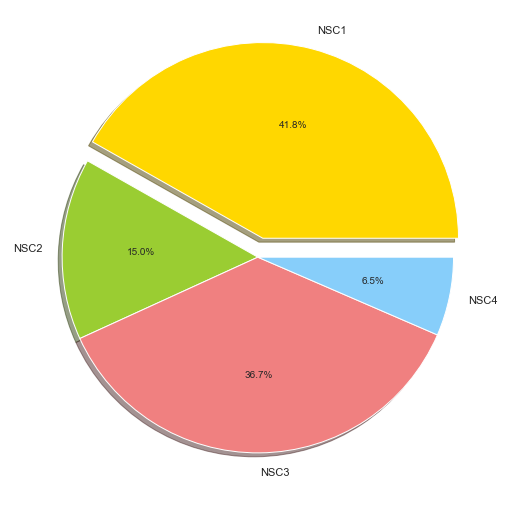

La station M8h


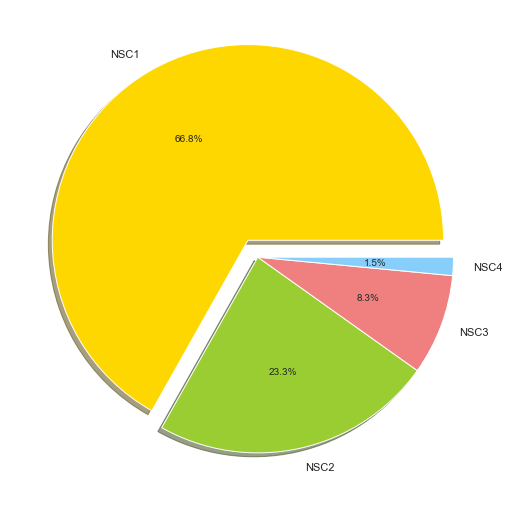

La station M8i


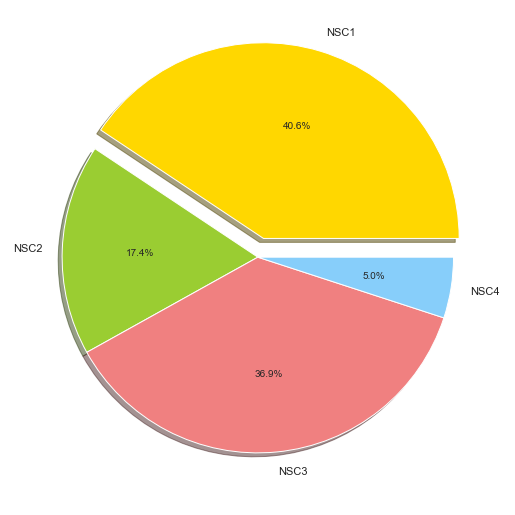

La station M8j


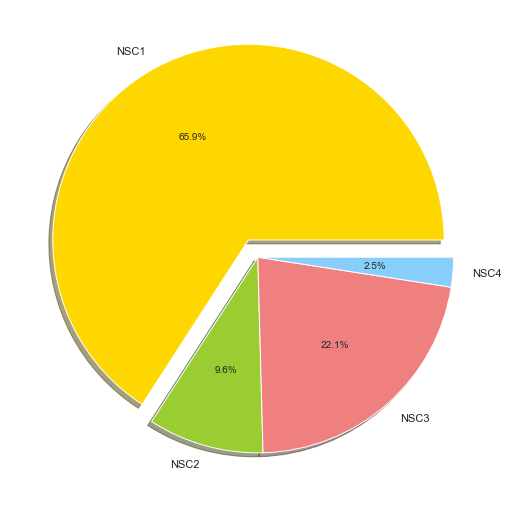

La station M8k


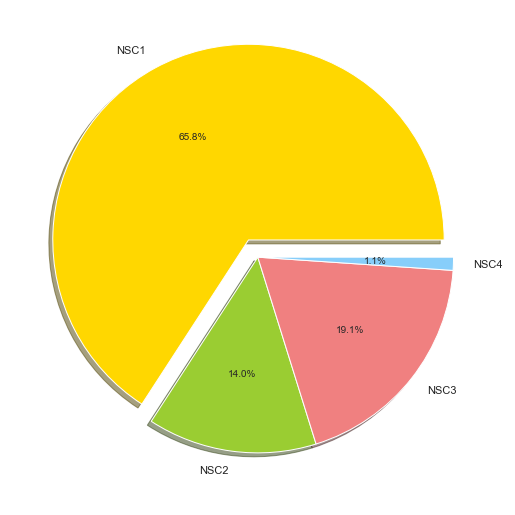

La station M8n


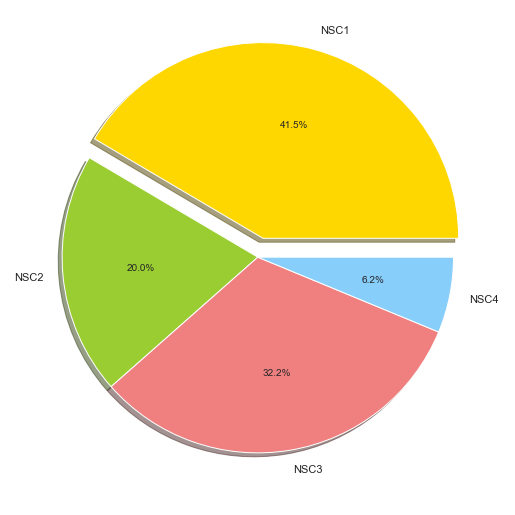

La station M8o


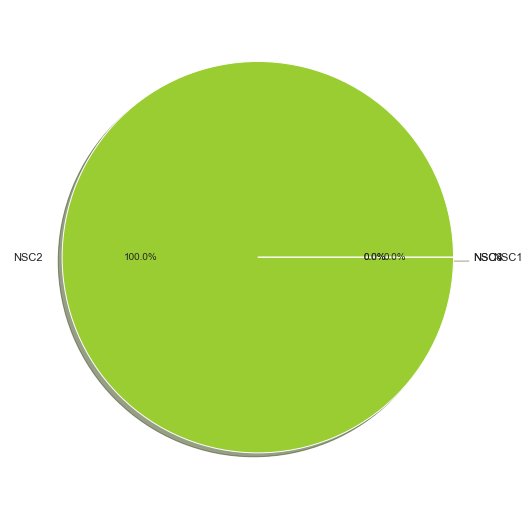

In [60]:
# Data to plot
for i in range(44):
    labels = 'NSC1', 'NSC2', 'NSC3', 'NSC4'
    sizes = [len(NSC1[i]), len(NSC2[i]), len(NSC3[i]), len(NSC4[i])]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0, 0)  # explode 1st slice
# Plot
    print('La station',keys[i])
    plt.figure(figsize=(13, 9))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
    plt.show()